In [1]:
import pandas as pd
import scipy as sc
import numpy as np

In [25]:
import sqlite3
import os
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil

# notice we are adding two new imports for visualizations; This was not here last class
from itertools import product
from pandas_profiling import ProfileReport

%matplotlib inline

# for better resolution plots
%config InlineBackend.figure_format = 'retina' # optionally, you can change 'svg' to 'retina'

# Seeting seaborn style
sns.set()

In [2]:
newland_train = pd.read_excel('Train.xlsx')
newland_test = pd.read_excel('Test.xlsx')

In [3]:
newland_train.head() 

,CITIZEN_ID,Name,Birthday,Native Continent,Marital Status,Lives with,Base Area,Education Level,Years of Education,Employment Sector,Role,Working Hours per week,Money Received,Ticket Price,Income
0,12486,Mr. Adam Glover,"July 1,2003",Europe,Married,Wife,Northbury,High School + PostGraduation,13,Private Sector - Services,Repair & constructions,40,0,2273,1
1,12487,Mr. Cameron McDonald,"January 25,2006",Europe,Married,Wife,Northbury,Professional School,12,Public Sector - Others,Repair & constructions,40,0,0,1
2,12488,Mr. Keith Davidson,"May 10,2009",Europe,Married,Wife,Northbury,Professional School,12,Private Sector - Services,Sales,46,0,2321,1
3,12489,Mr. Alexander Gill,"March 25,1985",Europe,Married,Wife,Northbury,High School - 2nd Cycle,11,Private Sector - Services,Security,37,5395,0,1
4,12490,Mr. Neil Piper,"May 29,2015",Europe,Single,Other Family,Northbury,PhD,21,Self-Employed (Individual),Professor,45,0,0,1


In [4]:
newland_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22400 entries, 0 to 22399
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CITIZEN_ID              22400 non-null  int64 
 1   Name                    22400 non-null  object
 2   Birthday                22400 non-null  object
 3   Native Continent        22400 non-null  object
 4   Marital Status          22400 non-null  object
 5   Lives with              22400 non-null  object
 6   Base Area               22400 non-null  object
 7   Education Level         22400 non-null  object
 8   Years of Education      22400 non-null  int64 
 9   Employment Sector       22400 non-null  object
 10  Role                    22400 non-null  object
 11  Working Hours per week  22400 non-null  int64 
 12  Money Received          22400 non-null  int64 
 13  Ticket Price            22400 non-null  int64 
 14  Income                  22400 non-null  int64 
dtypes:

In [5]:
newland_test.head()

,CITIZEN_ID,Name,Birthday,Native Continent,Marital Status,Lives with,Base Area,Education Level,Years of Education,Employment Sector,Role,Working Hours per week,Money Received,Ticket Price
0,34886,Mr. Dan Kerr,"May 13,2012",Europe,Married,Wife,Northbury,Bachelors + PostGraduation,16,Private Sector - Services,Sales,40,0,0
1,34887,Miss Olivia Grant,"August 9,2014",Europe,Single,Other Family,Northbury,Bachelors + PostGraduation,16,Private Sector - Services,Professor,36,0,0
2,34888,Mr. Trevor Simpson,"May 23,2020",Europe,Divorced,Other Family,Northbury,Professional School + PostGraduation,13,Private Sector - Services,Management,50,12940,0
3,34889,Mr. David Clark,"April 15,2016",Europe,Married,Wife,Northbury,Professional School,12,Private Sector - Services,Professor,48,0,1827
4,34890,Mr. Gavin Lambert,"April 22,2011",Europe,Married,Wife,Watford,Bachelors,15,Public Sector - Others,Professor,45,0,0


In [24]:
newland_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10100 entries, 0 to 10099
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CITIZEN_ID              10100 non-null  int64 
 1   Name                    10100 non-null  object
 2   Birthday                10100 non-null  object
 3   Native Continent        10100 non-null  object
 4   Marital Status          10100 non-null  object
 5   Lives with              10100 non-null  object
 6   Base Area               10100 non-null  object
 7   Education Level         10100 non-null  object
 8   Years of Education      10100 non-null  int64 
 9   Employment Sector       10100 non-null  object
 10  Role                    10100 non-null  object
 11  Working Hours per week  10100 non-null  int64 
 12  Money Received          10100 non-null  int64 
 13  Ticket Price            10100 non-null  int64 
dtypes: int64(5), object(9)
memory usage: 1.1+ MB


In [7]:
newland_train.describe(include = 'all')

,CITIZEN_ID,Name,Birthday,Native Continent,Marital Status,Lives with,Base Area,Education Level,Years of Education,Employment Sector,Role,Working Hours per week,Money Received,Ticket Price,Income
count,22400.000000,22400,22400,22400,22400,22400,22400,22400,22400.000000,22400,22400,22400.000000,22400.000000,22400.000000,22400.000000
unique,NaN,16074,11257,5,7,6,40,16,NaN,9,15,NaN,NaN,NaN,NaN
top,NaN,Mr. Sam Oliver,"August 15,2025",Europe,Married,Wife,Northbury,Professional School,NaN,Private Sector - Services,Professor,NaN,NaN,NaN,NaN
freq,NaN,4,9,19111,10219,9012,20074,7232,NaN,15599,2849,NaN,NaN,NaN,NaN
mean,23685.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.173884,NaN,NaN,40.483795,1324.915357,109.145313,0.237098
std,6466.467351,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.512451,NaN,NaN,12.370921,9227.771813,500.208904,0.425313
min,12486.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,1.000000,0.000000,0.000000,0.000000
25%,18085.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.000000,NaN,NaN,40.000000,0.000000,0.000000,0.000000
50%,23685.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.000000,NaN,NaN,40.000000,0.000000,0.000000,0.000000
75%,29285.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.000000,NaN,NaN,45.000000,0.000000,0.000000,0.000000


In [12]:
from datetime import datetime
import calendar

In [13]:
#Created the variable age
newland_train["Birth_year"] = newland_train["Birthday"].str.split(',', expand=True)[1]
newland_train["Birth_year"] = newland_train["Birth_year"].astype(int)
newland_train["Age"] = 2046 - newland_train["Birth_year"]

In [14]:
newland_train.loc[(newland_train['Money Received'] == 0) & (newland_train['Ticket Price'] == 0), 'Group'] = 'A'
newland_train.loc[(newland_train['Money Received'] > 0) & (newland_train['Ticket Price'] == 0), 'Group'] = 'B'
newland_train.loc[(newland_train['Money Received'] == 0) & (newland_train['Ticket Price'] > 0), 'Group'] = 'C'

In [23]:
newland_train.head()

,Native Continent,Marital Status,Lives with,Base Area,Education Level,Years of Education,Employment Sector,Role,Working Hours per week,Income,Age,Group
CITIZEN_ID,,,,,,,,,,,,
12486,Europe,Married,Wife,Northbury,High School + PostGraduation,13,Private Sector - Services,Repair & constructions,40,1,43,C
12487,Europe,Married,Wife,Northbury,Professional School,12,Public Sector - Others,Repair & constructions,40,1,40,A
12488,Europe,Married,Wife,Northbury,Professional School,12,Private Sector - Services,Sales,46,1,37,C
12489,Europe,Married,Wife,Northbury,High School - 2nd Cycle,11,Private Sector - Services,Security,37,1,61,B
12490,Europe,Single,Other Family,Northbury,PhD,21,Self-Employed (Individual),Professor,45,1,31,A


In [15]:
#Removed 4 columns
newland_train.drop(columns=['Birthday', 'Name', 'Birth_year', 'Money Received','Ticket Price'], inplace=True)

In [16]:
newland_train.set_index('CITIZEN_ID', inplace=True)

In [17]:
newland_train.corr()

,Years of Education,Working Hours per week,Income,Age
Years of Education,1.000000,0.138516,0.333089,0.035241
Working Hours per week,0.138516,1.000000,0.219890,0.064900
Income,0.333089,0.219890,1.000000,0.233157
Age,0.035241,0.064900,0.233157,1.000000


In [123]:
cor_spearman = newland_train.corr(method ='spearman')
cor_spearman

,Years of Education,Working Hours per week,Income,Age
Years of Education,1.000000,0.159087,0.322377,0.053780
Working Hours per week,0.159087,1.000000,0.258562,0.139271
Income,0.322377,0.258562,1.000000,0.271294
Age,0.053780,0.139271,0.271294,1.000000


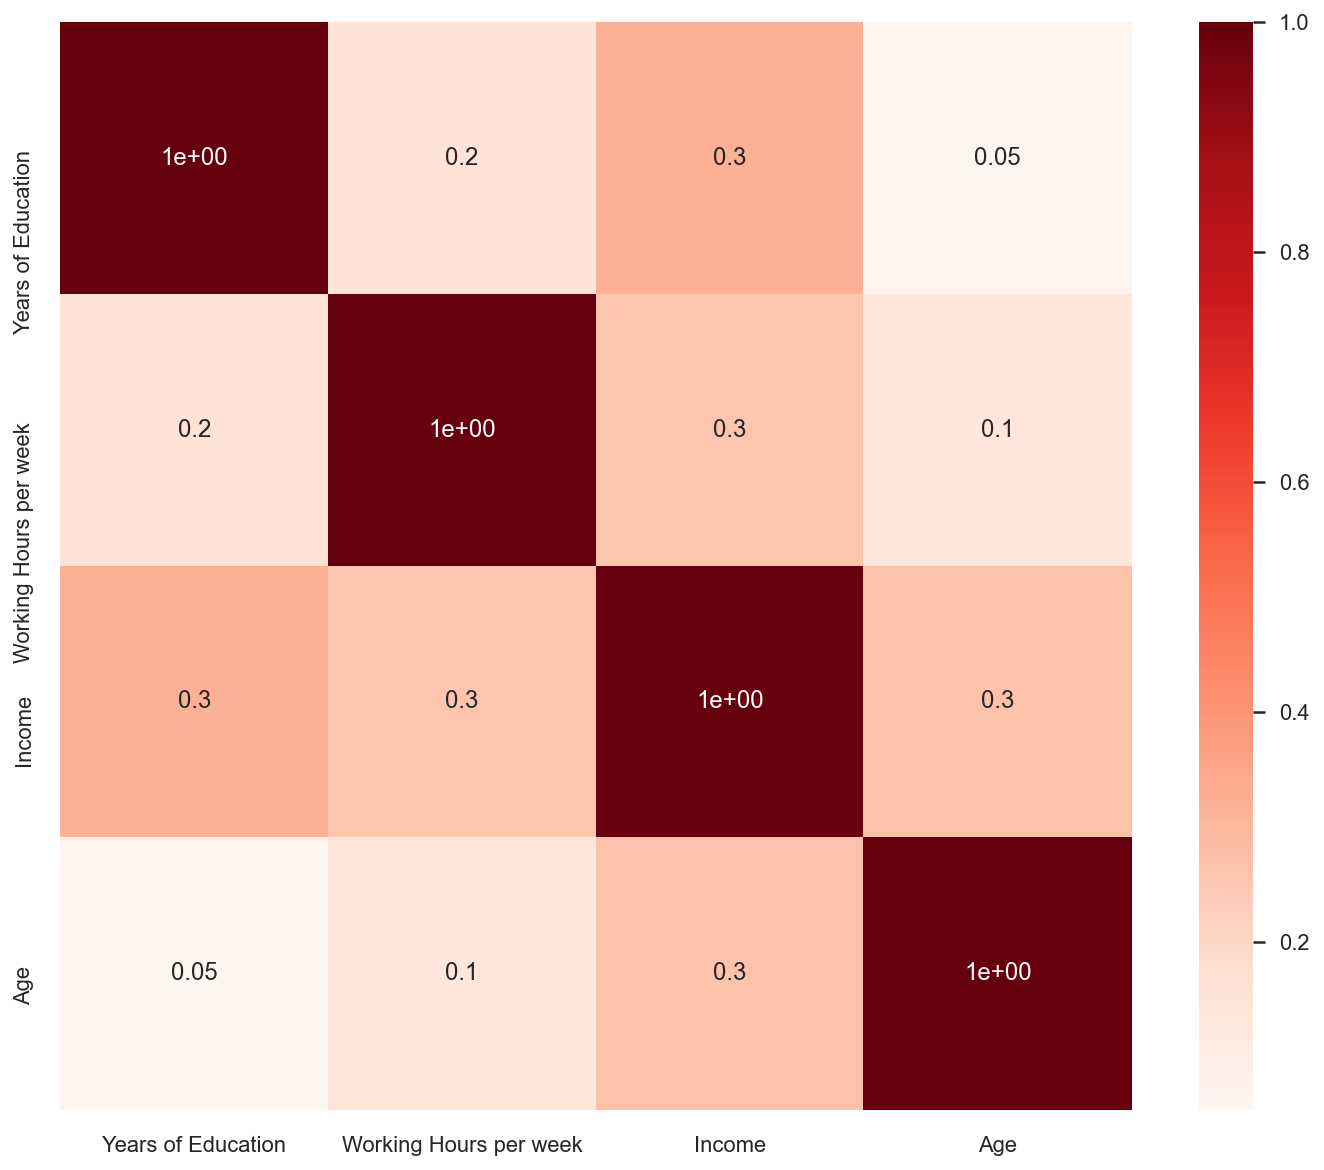

In [128]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,10))
sns.heatmap(data = cor_spearman, annot = True, cmap = plt.cm.Reds, fmt='.1')
plt.show()

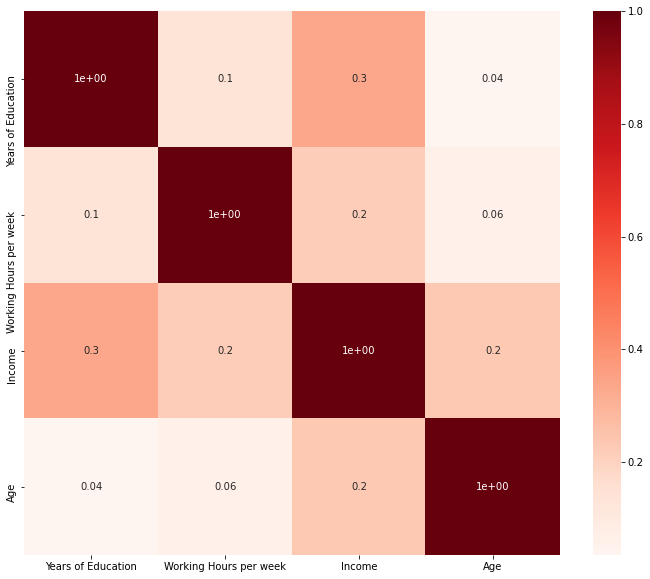

In [19]:
cor_spearman = newland_train.corr()
cor_heatmap(cor_spearman)
#Our numerical variables are independent

In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV

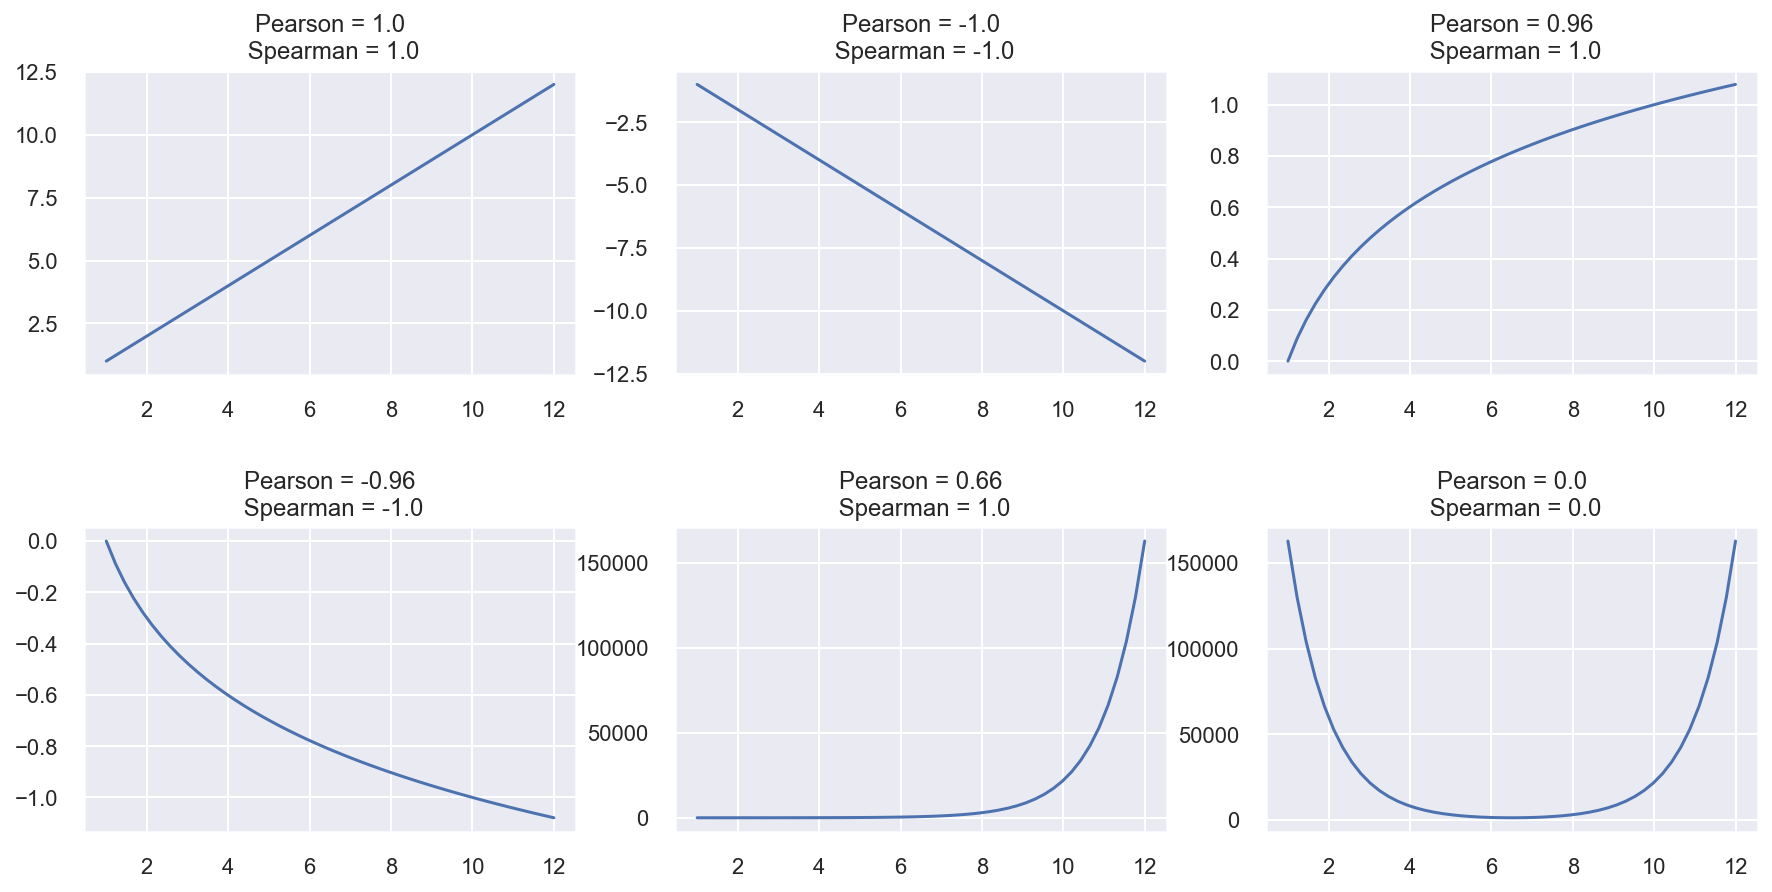

In [132]:
# Defining my x and y's
x = np.linspace(1,12)
y1 = np.log10(x)
y2 = np.exp(x)
y_prov = y2[::-1]
y3 = y2 + y_prov

#plot the resulting arrays
fig, ax = plt.subplots(2,3, figsize=(15,7))
plt.subplots_adjust(hspace = 0.5)

# create function to calculate pearson correlation
def corr_pearson(var1,var2):
    return round(np.corrcoef(var1,var2)[0][1],2)

# create function to calculate spearman correlation
def corr_spearman(var1,var2):
    return round(spearmanr(var1,var2)[0],2)

# create function to plot the different functions and define the title
def plot_line(row,col,x,y):
    ax[row][col].set_title("Pearson = " +  str(corr_pearson(x,y)) + "\n Spearman = " + str(corr_spearman(x,y)))
    ax[row][col].plot(x,y)

# call the function plot_line to plot the different functions
plot_line(0,0,x,x)
plot_line(0,1,x,-x)
plot_line(0,2,x,y1)
plot_line(1,0,x,-y1)
plot_line(1,1,x,y2)
plot_line(1,2,x,y3)

plt.show()

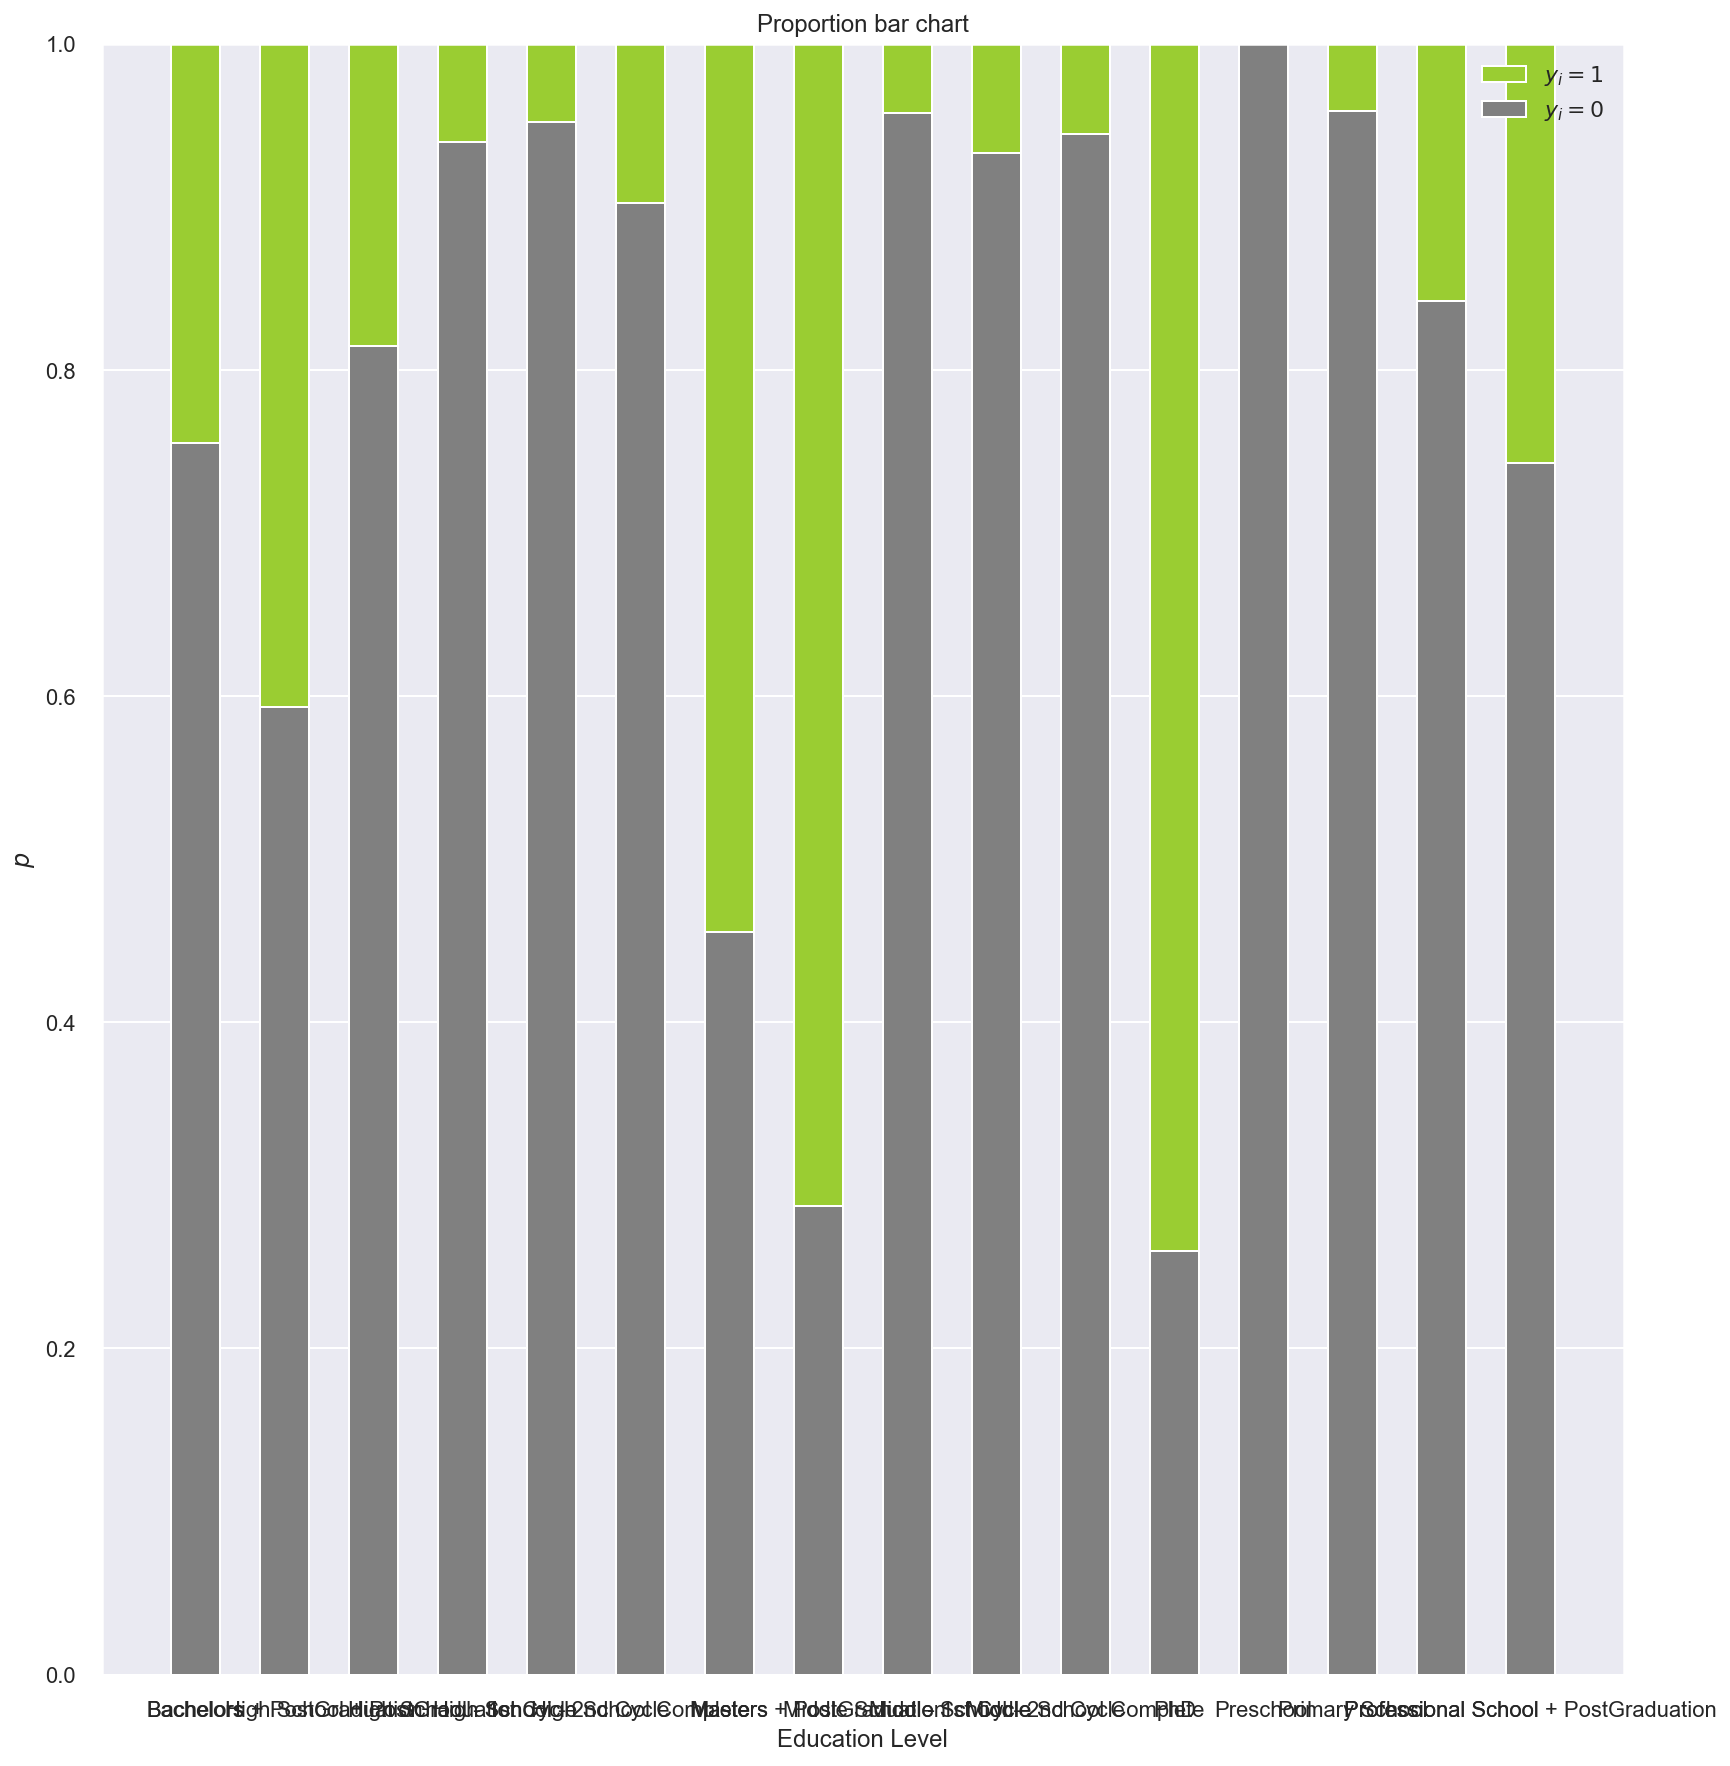

In [139]:
def bar_charts_categorical(df, feature, target):
    cont_tab = pd.crosstab(df[feature], df[target], margins = True)
    categories = cont_tab.index[:-1]
        
    fig = plt.figure(figsize=(30, 15))
  

    # auxiliary data for 122
    obs_pct = np.array([np.divide(cont_tab.iloc[:-1, 0].values, cont_tab.iloc[:-1, 2].values), 
                        np.divide(cont_tab.iloc[:-1, 1].values, cont_tab.iloc[:-1, 2].values)])
      
    plt.subplot(122)
    p1 = plt.bar(categories, obs_pct[0], 0.55, color="gray")
    p2 = plt.bar(categories, obs_pct[1], 0.55, bottom=obs_pct[0], color="yellowgreen")
    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'))
    plt.title("Proportion bar chart")
    plt.xlabel(feature)
    plt.ylabel("$p$")

    plt.show()
    
bar_charts_categorical(newland_train, "Education Level", "Income")

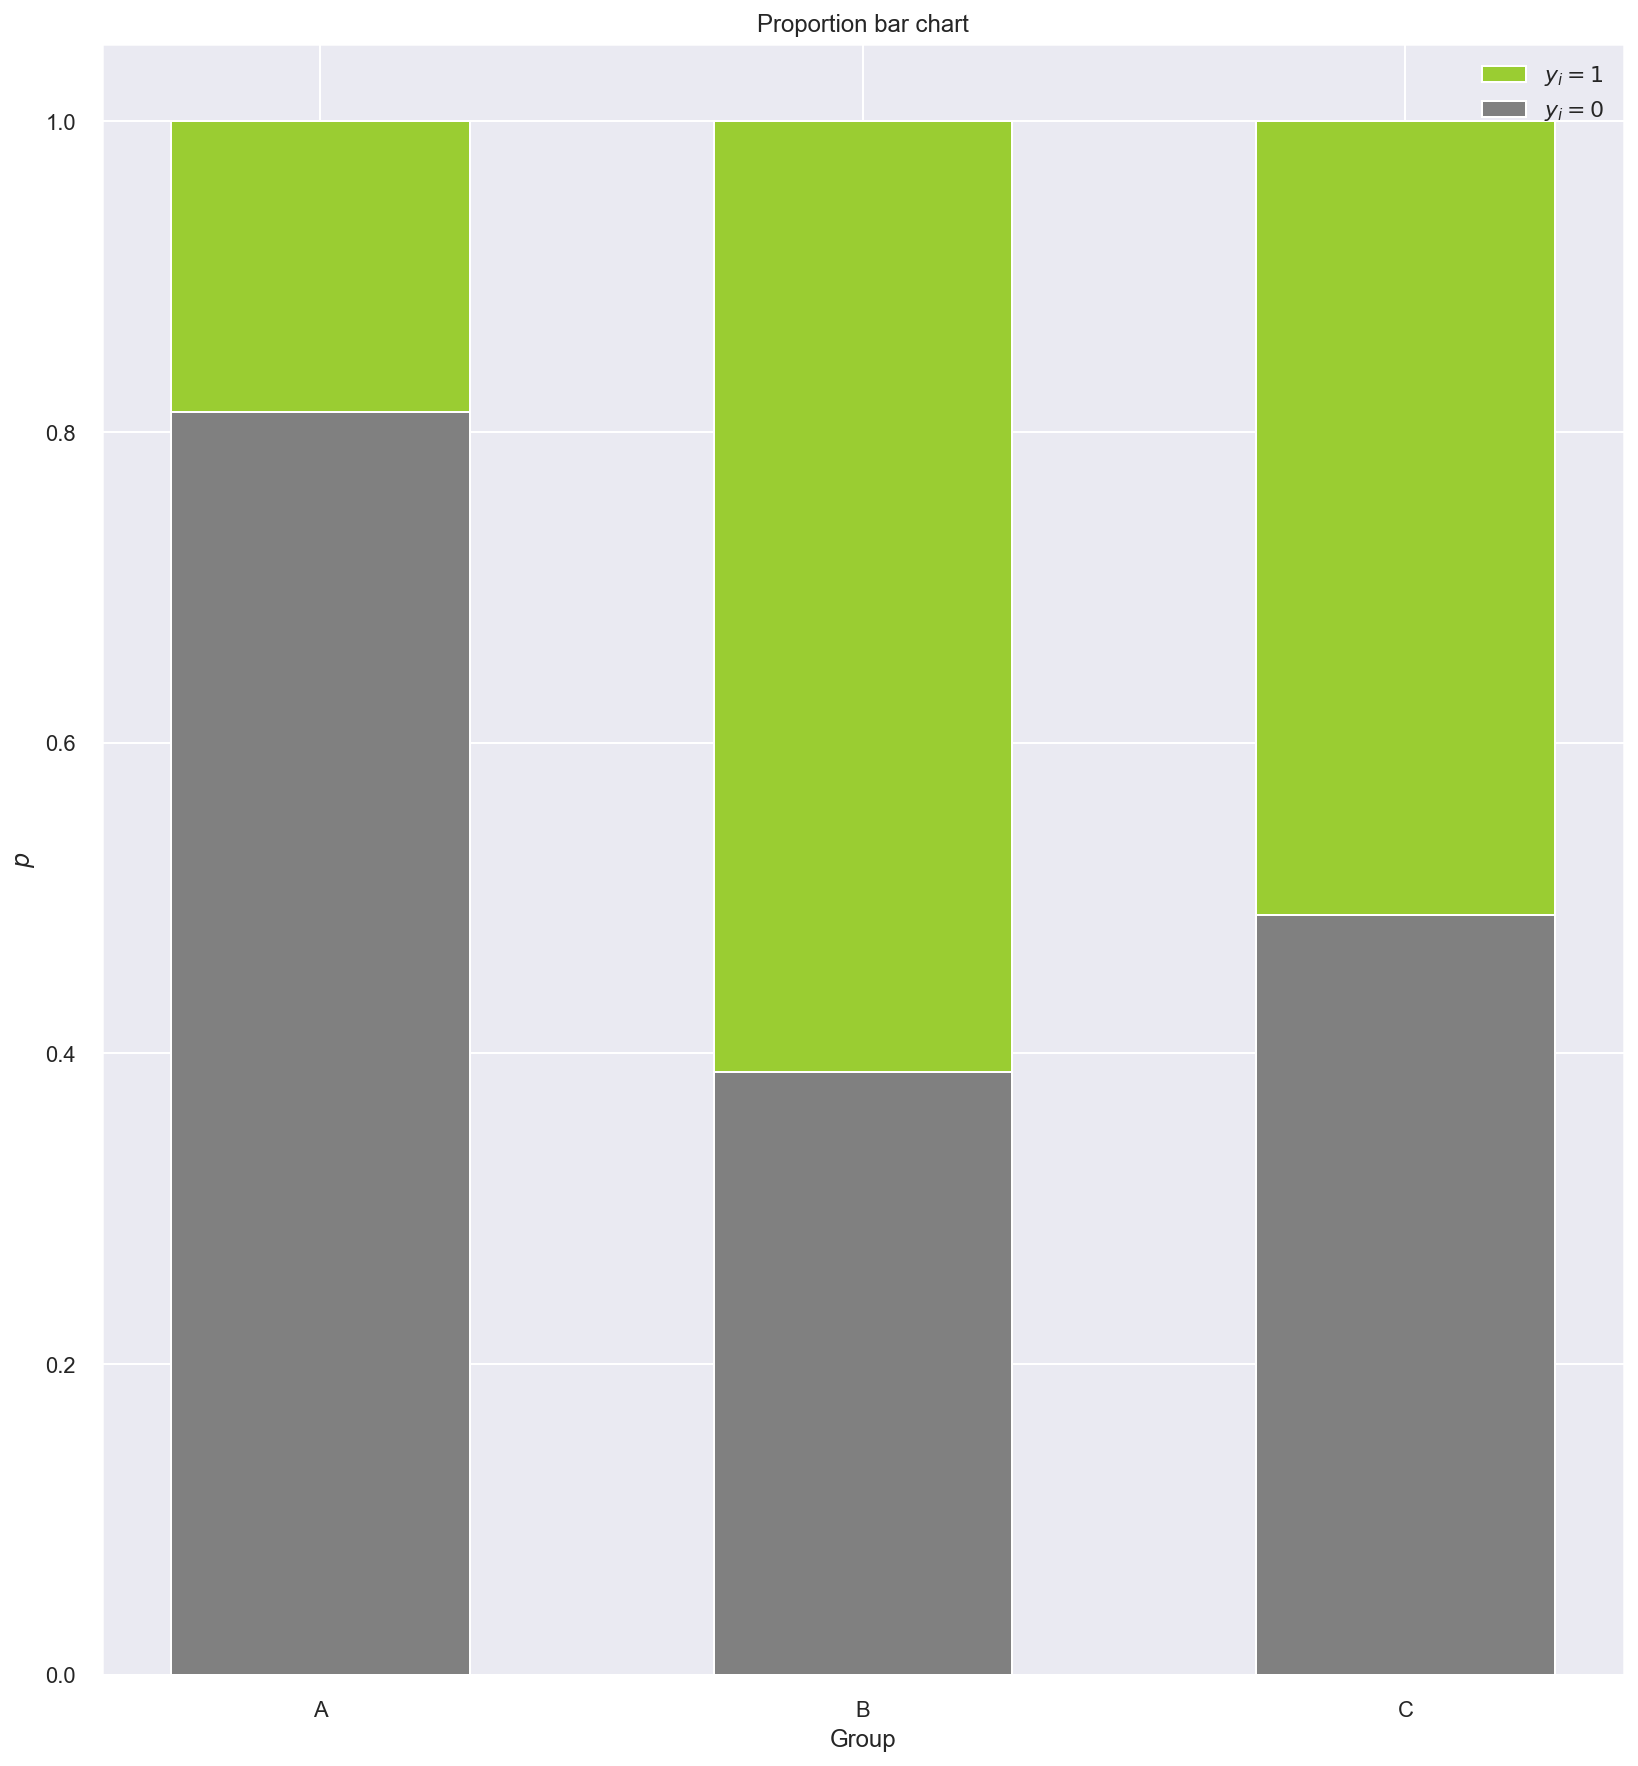

In [140]:
def bar_charts_categorical(df, feature, target):
    cont_tab = pd.crosstab(df[feature], df[target], margins = True)
    categories = cont_tab.index[:-1]
        
    fig = plt.figure(figsize=(30, 15))
  

    # auxiliary data for 122
    obs_pct = np.array([np.divide(cont_tab.iloc[:-1, 0].values, cont_tab.iloc[:-1, 2].values), 
                        np.divide(cont_tab.iloc[:-1, 1].values, cont_tab.iloc[:-1, 2].values)])
      
    plt.subplot(122)
    p1 = plt.bar(categories, obs_pct[0], 0.55, color="gray")
    p2 = plt.bar(categories, obs_pct[1], 0.55, bottom=obs_pct[0], color="yellowgreen")
    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'))
    plt.title("Proportion bar chart")
    plt.xlabel(feature)
    plt.ylabel("$p$")

    plt.show()
    
bar_charts_categorical(newland_train, "Group", "Income")

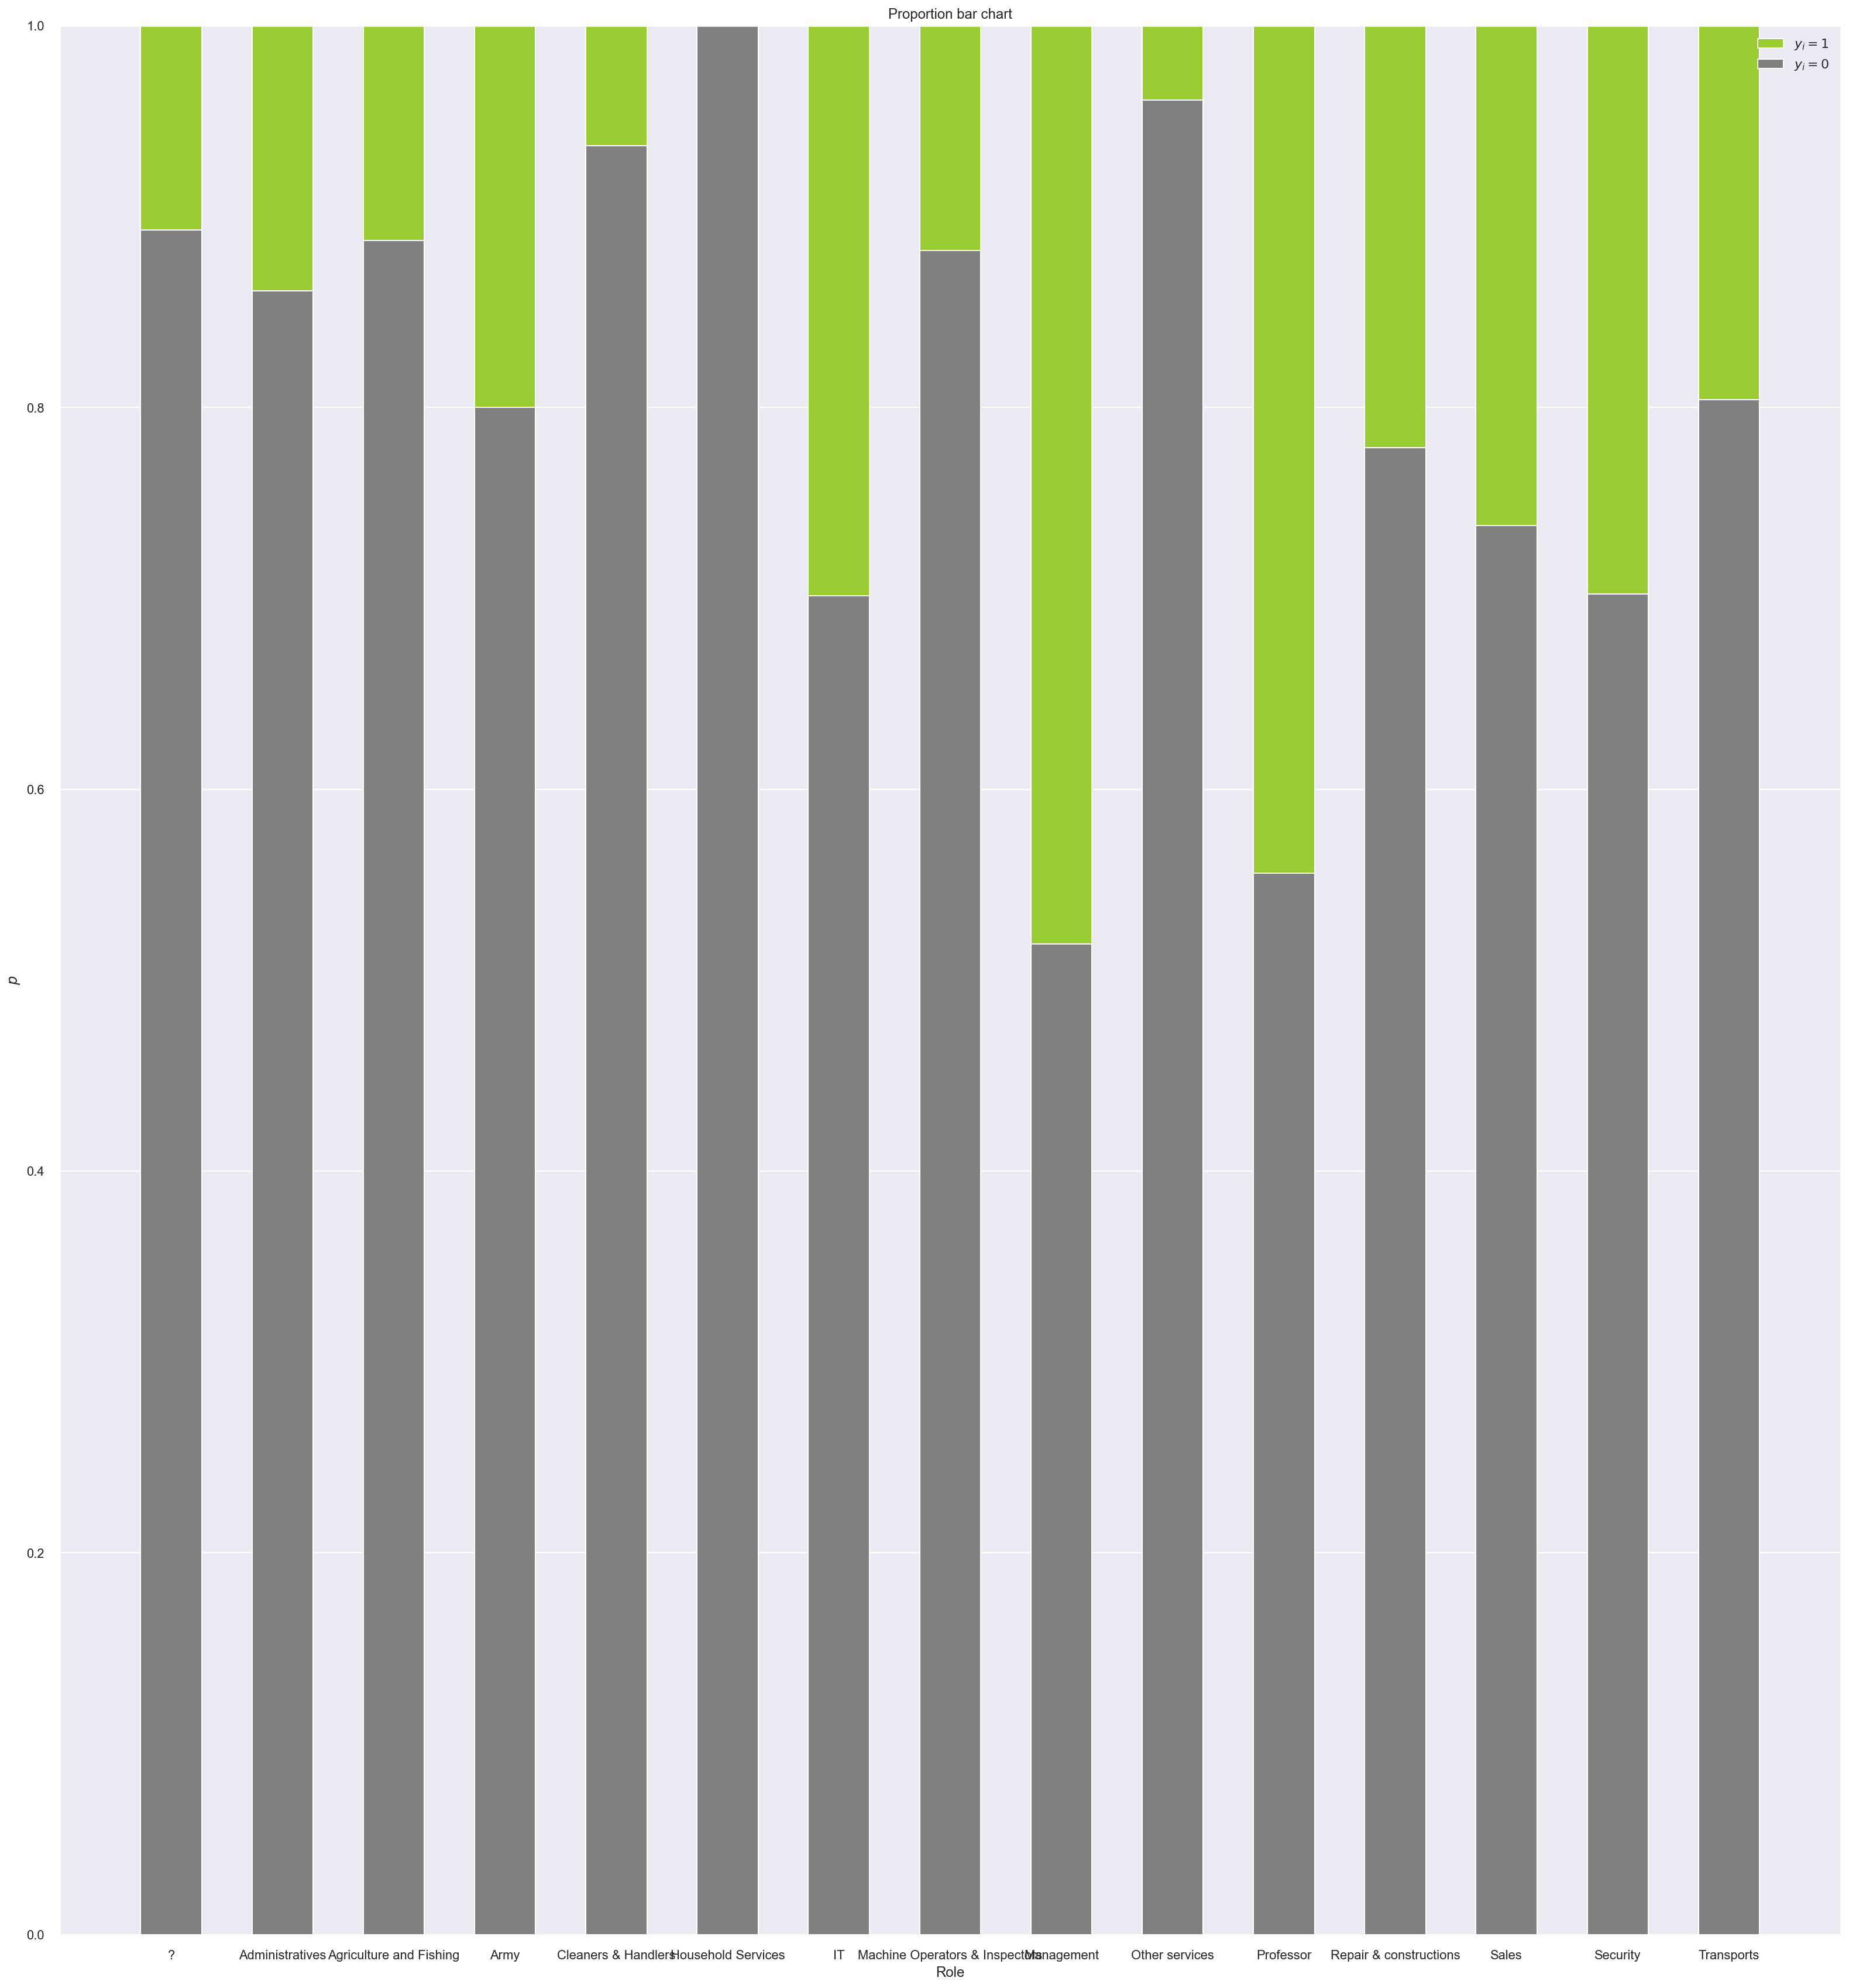

In [157]:
def bar_charts_categorical(df, feature, target):
    cont_tab = pd.crosstab(df[feature], df[target], margins = True)
    categories = cont_tab.index[:-1]
        
    fig = plt.figure(figsize=(60, 30))
  

    # auxiliary data for 122
    obs_pct = np.array([np.divide(cont_tab.iloc[:-1, 0].values, cont_tab.iloc[:-1, 2].values), 
                        np.divide(cont_tab.iloc[:-1, 1].values, cont_tab.iloc[:-1, 2].values)])
      
    plt.subplot(122)
    p1 = plt.bar(categories, obs_pct[0], 0.55, color="gray")
    p2 = plt.bar(categories, obs_pct[1], 0.55, bottom=obs_pct[0], color="yellowgreen")
    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'))
    plt.title("Proportion bar chart")
    plt.xlabel(feature)
    plt.ylabel("$p$")

    plt.show()
    
bar_charts_categorical(newland_train, "Role", "Income")

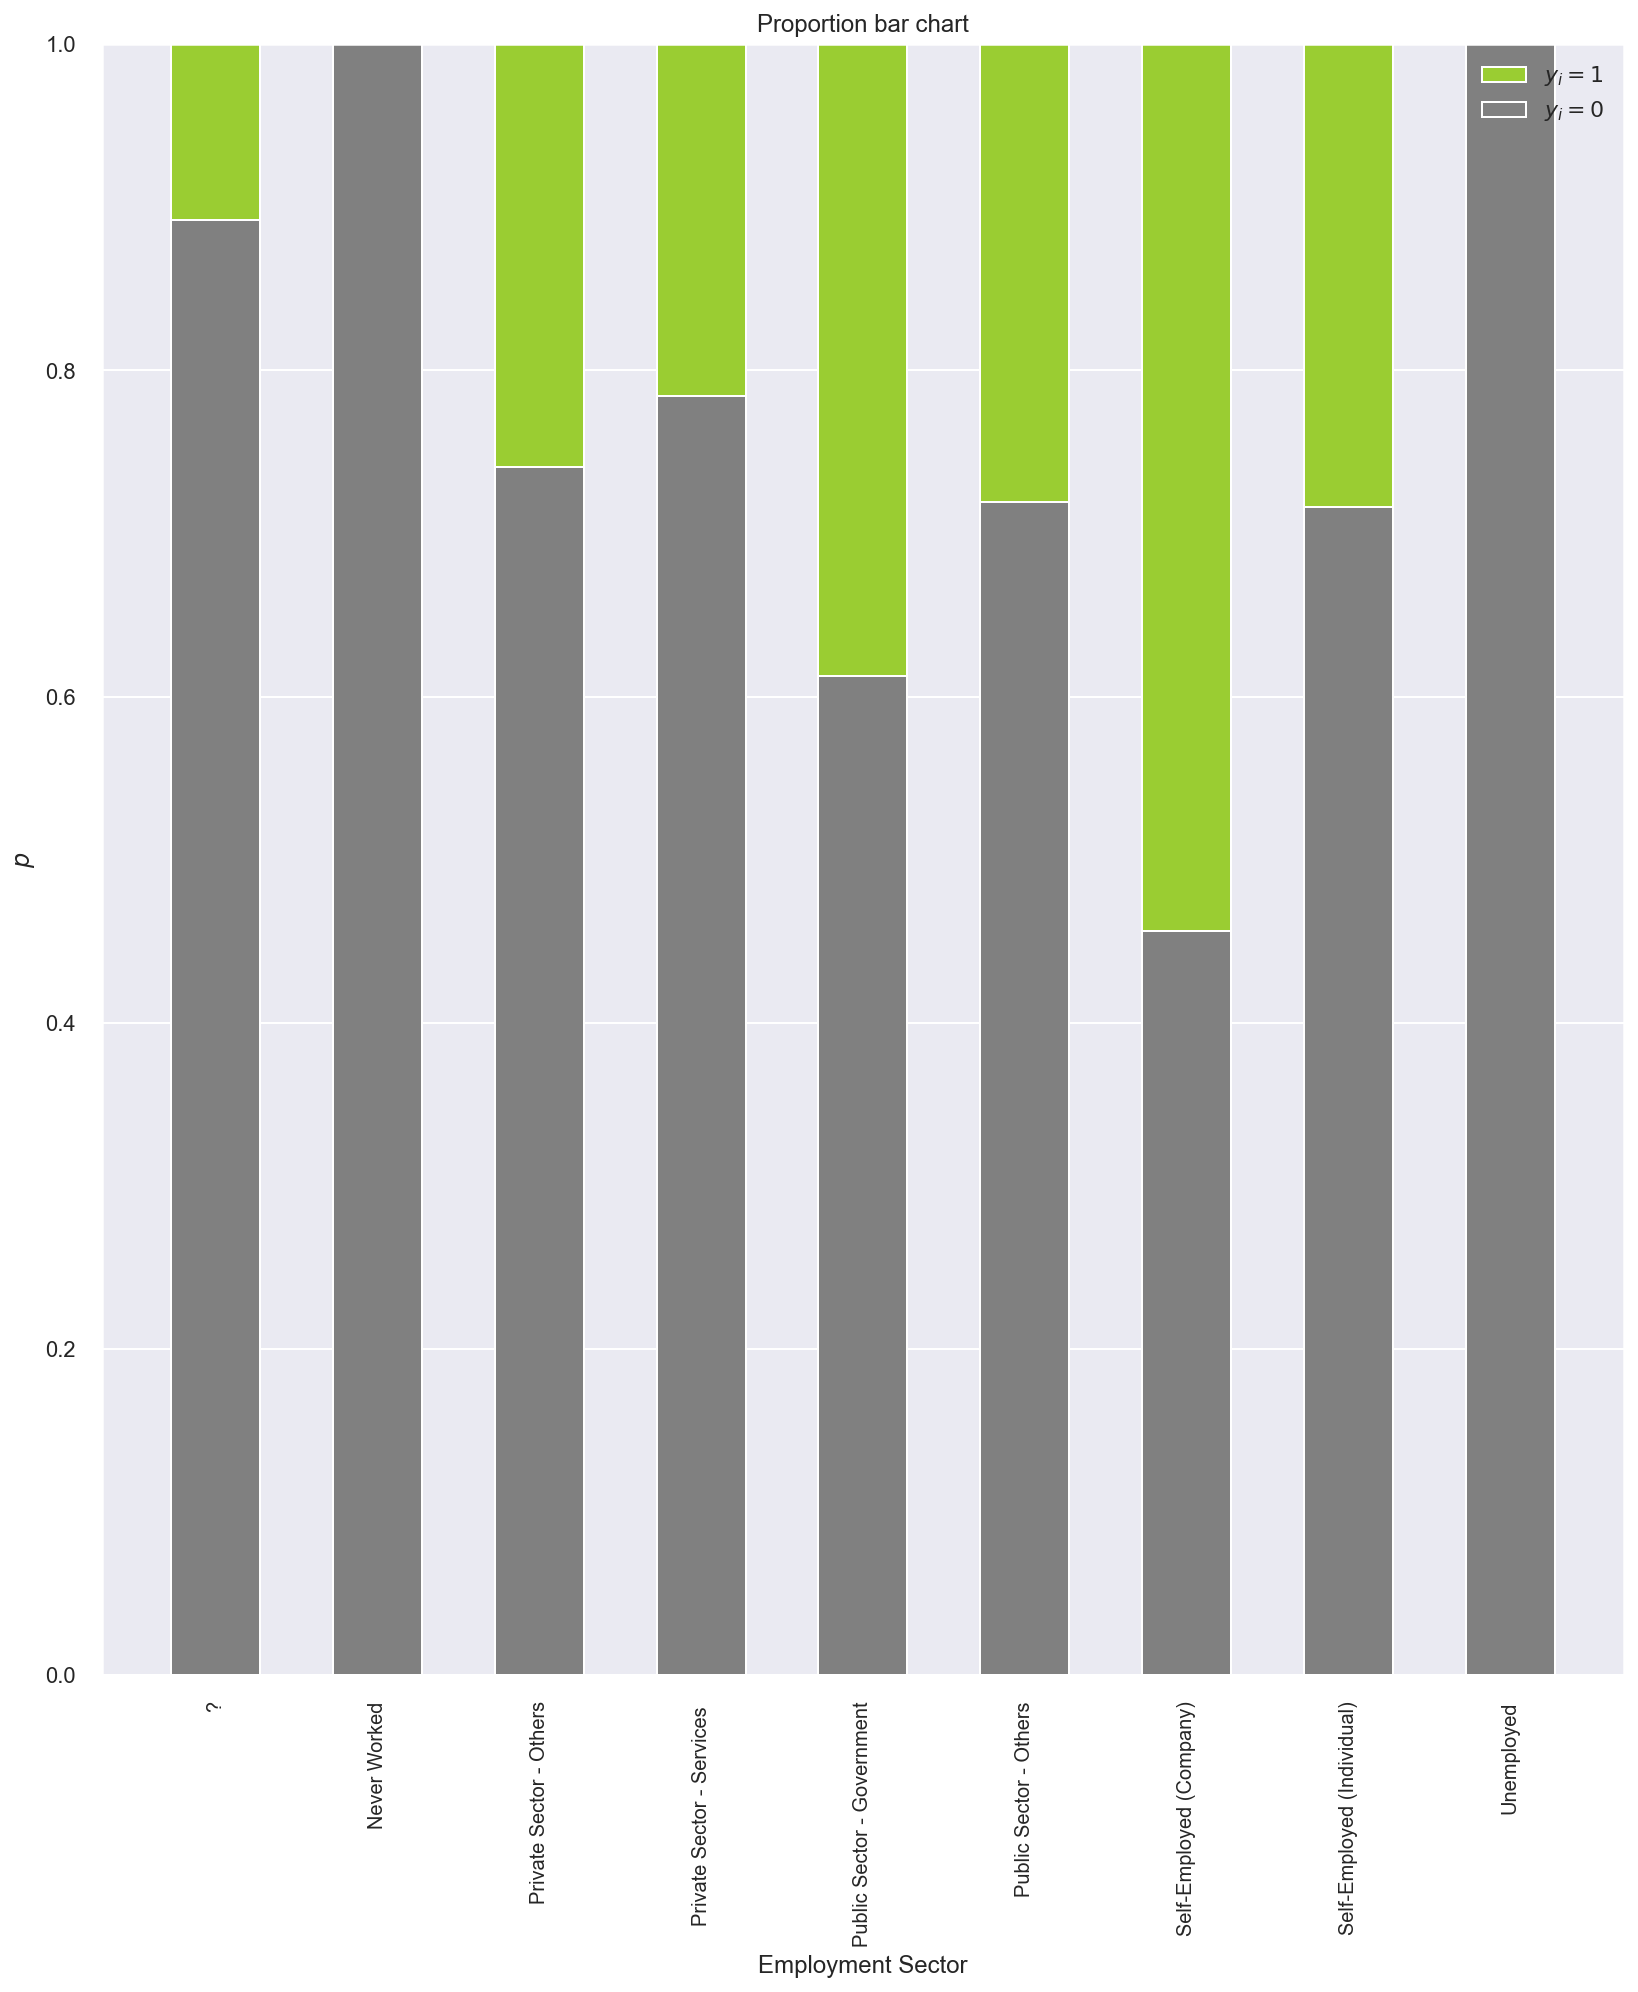

In [163]:
def bar_charts_categorical(df, feature, target):
    cont_tab = pd.crosstab(df[feature], df[target], margins = True)
    categories = cont_tab.index[:-1]
        
    fig = plt.figure(figsize=(30, 15))
  

    # auxiliary data for 122
    obs_pct = np.array([np.divide(cont_tab.iloc[:-1, 0].values, cont_tab.iloc[:-1, 2].values), 
                        np.divide(cont_tab.iloc[:-1, 1].values, cont_tab.iloc[:-1, 2].values)])
      
    plt.subplot(122)
    p1 = plt.bar(categories, obs_pct[0], 0.55, color="gray")
    p2 = plt.bar(categories, obs_pct[1], 0.55, bottom=obs_pct[0], color="yellowgreen")
    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'))
    plt.title("Proportion bar chart")
    plt.xlabel(feature)
    plt.ylabel("$p$")
    plt.xticks(fontsize=10, rotation=90)
    plt.show()
    
bar_charts_categorical(newland_train, "Employment Sector", "Income")

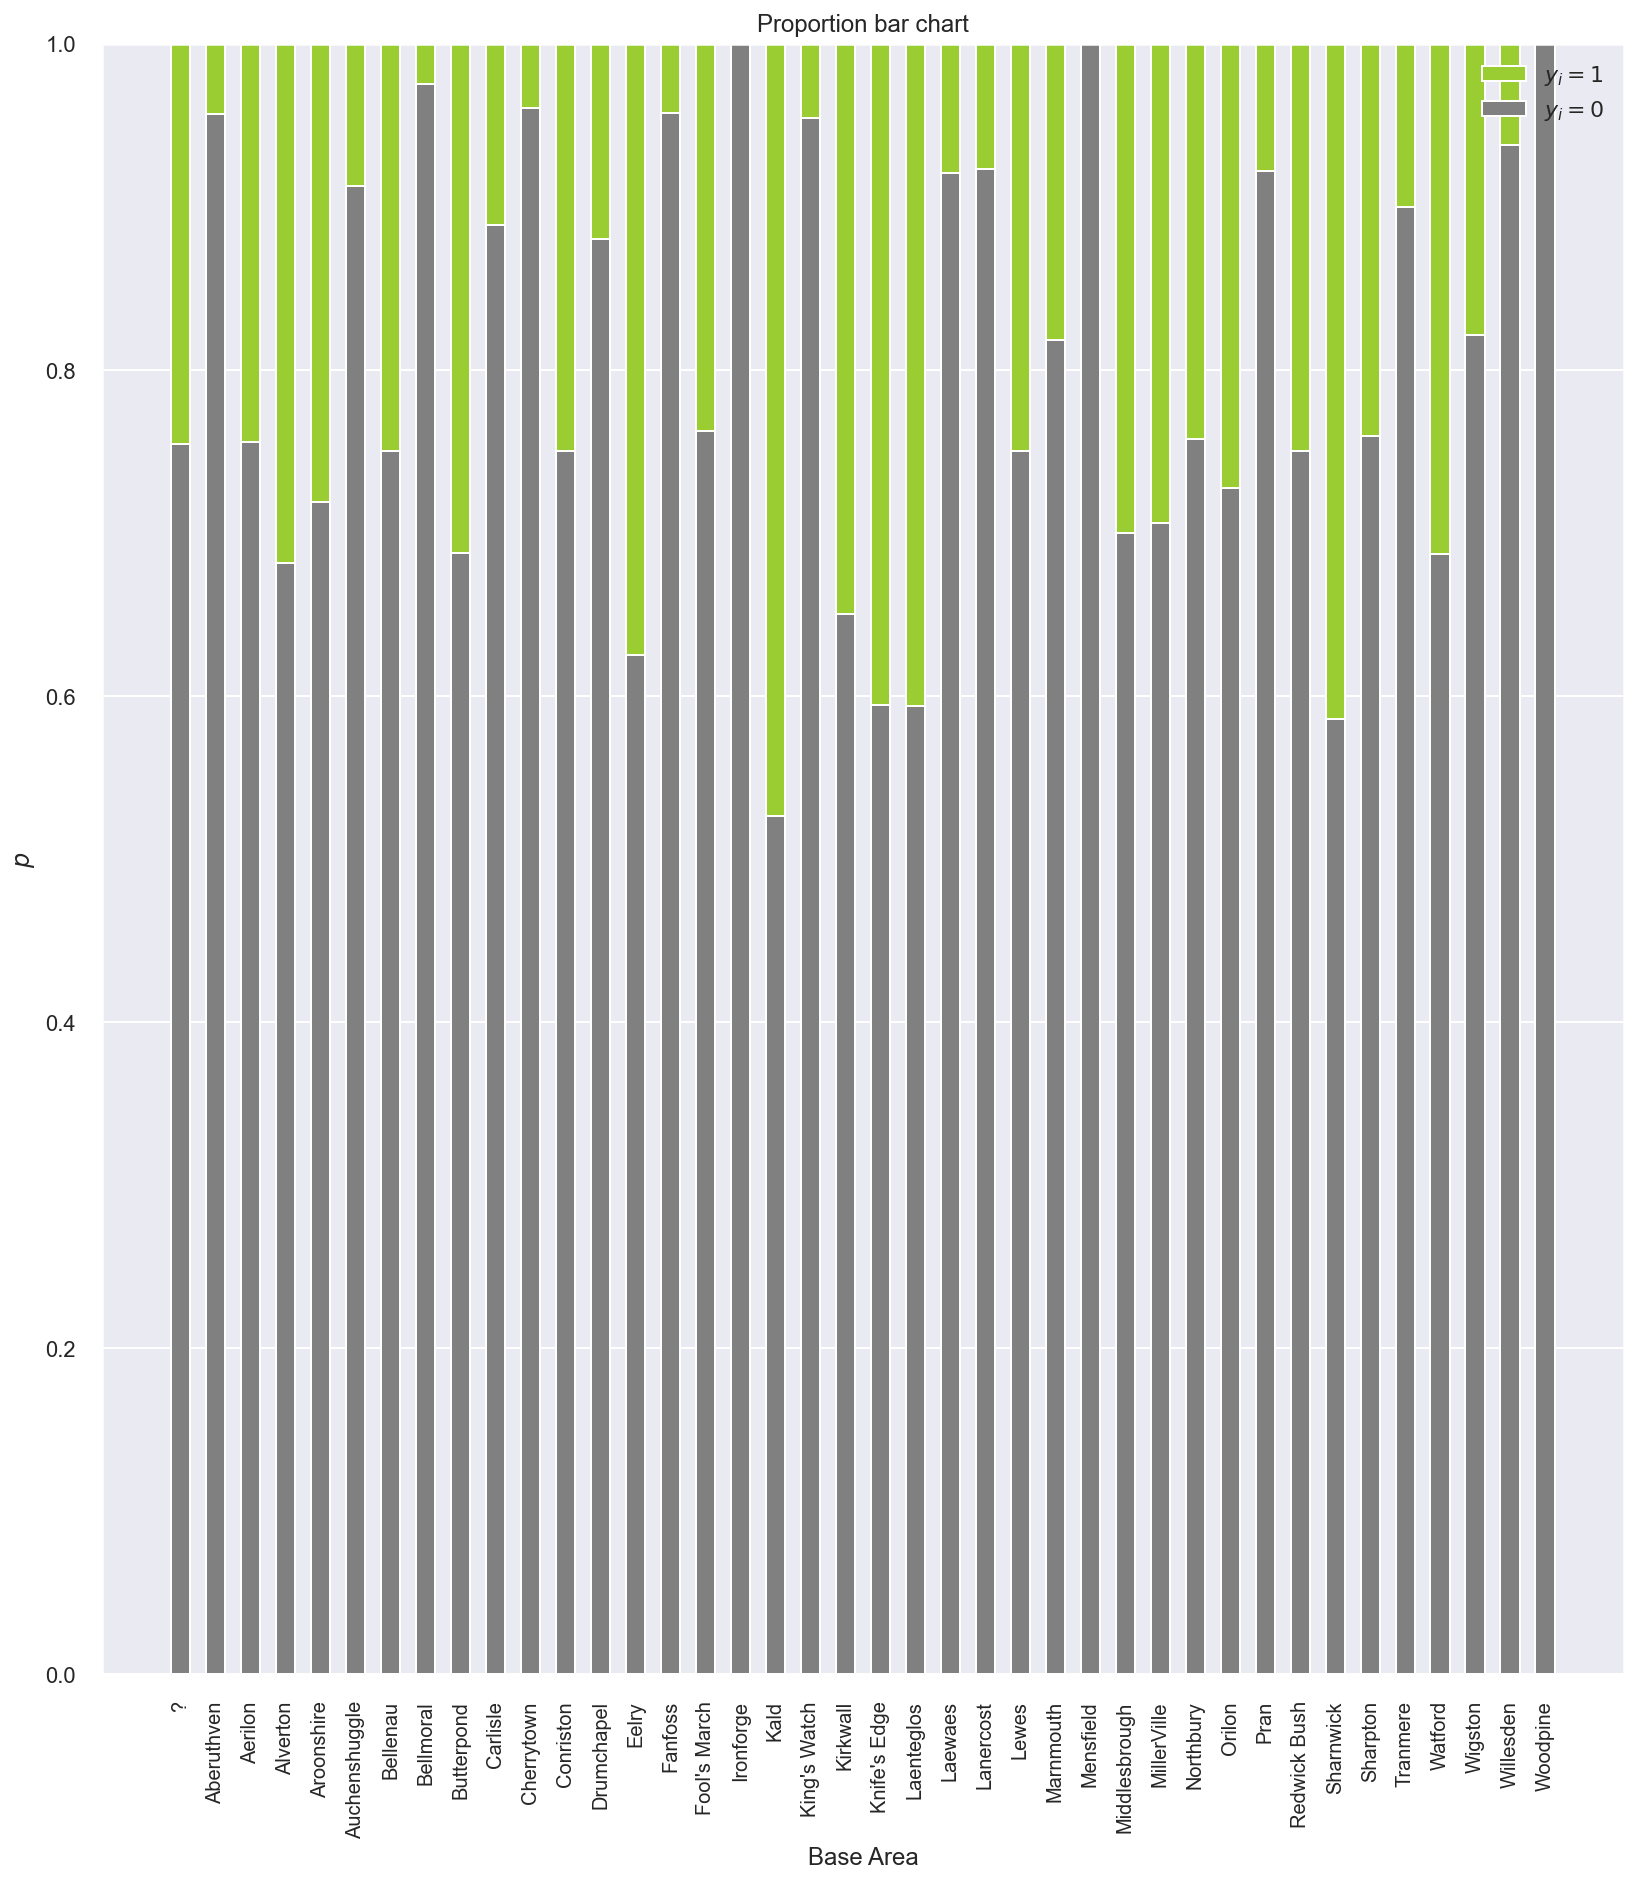

In [162]:
def bar_charts_categorical(df, feature, target):
    cont_tab = pd.crosstab(df[feature], df[target], margins = True)
    categories = cont_tab.index[:-1]
        
    fig = plt.figure(figsize=(30, 15))
  

    # auxiliary data for 122
    obs_pct = np.array([np.divide(cont_tab.iloc[:-1, 0].values, cont_tab.iloc[:-1, 2].values), 
                        np.divide(cont_tab.iloc[:-1, 1].values, cont_tab.iloc[:-1, 2].values)])
      
    plt.subplot(122)
    p1 = plt.bar(categories, obs_pct[0], 0.55, color="gray")
    p2 = plt.bar(categories, obs_pct[1], 0.55, bottom=obs_pct[0], color="yellowgreen")
    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'))
    plt.title("Proportion bar chart")
    plt.xlabel(feature)
    plt.ylabel("$p$")
    plt.xticks(fontsize=10, rotation=90)
    plt.show()
    
bar_charts_categorical(newland_train, "Base Area", "Income")

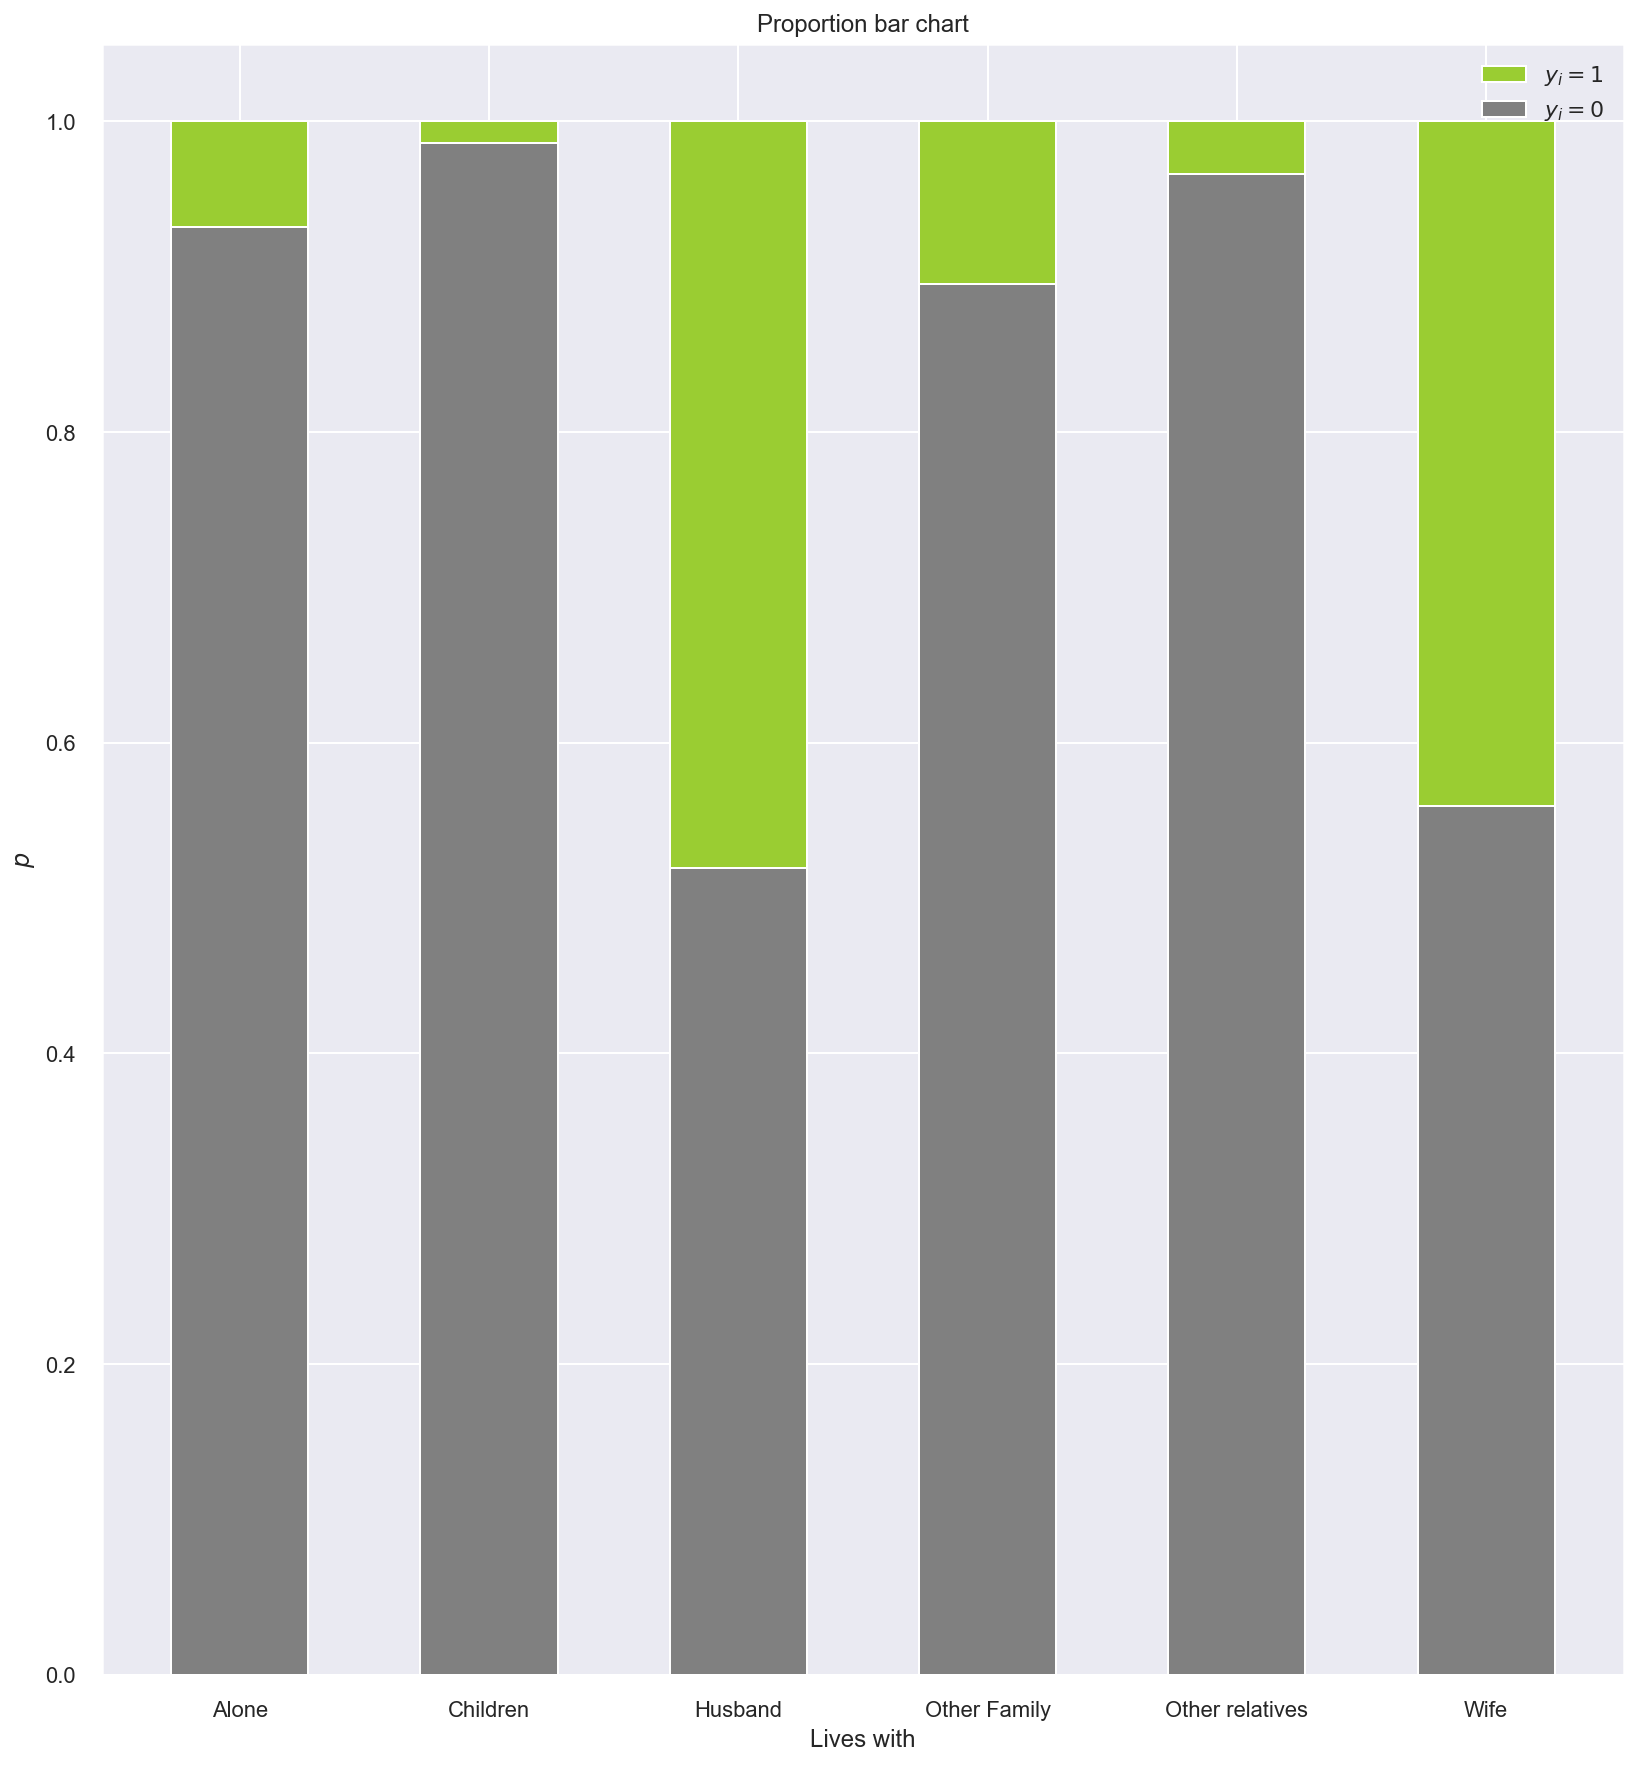

In [145]:
def bar_charts_categorical(df, feature, target):
    cont_tab = pd.crosstab(df[feature], df[target], margins = True)
    categories = cont_tab.index[:-1]
        
    fig = plt.figure(figsize=(30, 15))
  

    # auxiliary data for 122
    obs_pct = np.array([np.divide(cont_tab.iloc[:-1, 0].values, cont_tab.iloc[:-1, 2].values), 
                        np.divide(cont_tab.iloc[:-1, 1].values, cont_tab.iloc[:-1, 2].values)])
      
    plt.subplot(122)
    p1 = plt.bar(categories, obs_pct[0], 0.55, color="gray")
    p2 = plt.bar(categories, obs_pct[1], 0.55, bottom=obs_pct[0], color="yellowgreen")
    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'))
    plt.title("Proportion bar chart")
    plt.xlabel(feature)
    plt.ylabel("$p$")

    plt.show()
    
bar_charts_categorical(newland_train, "Lives with", "Income")

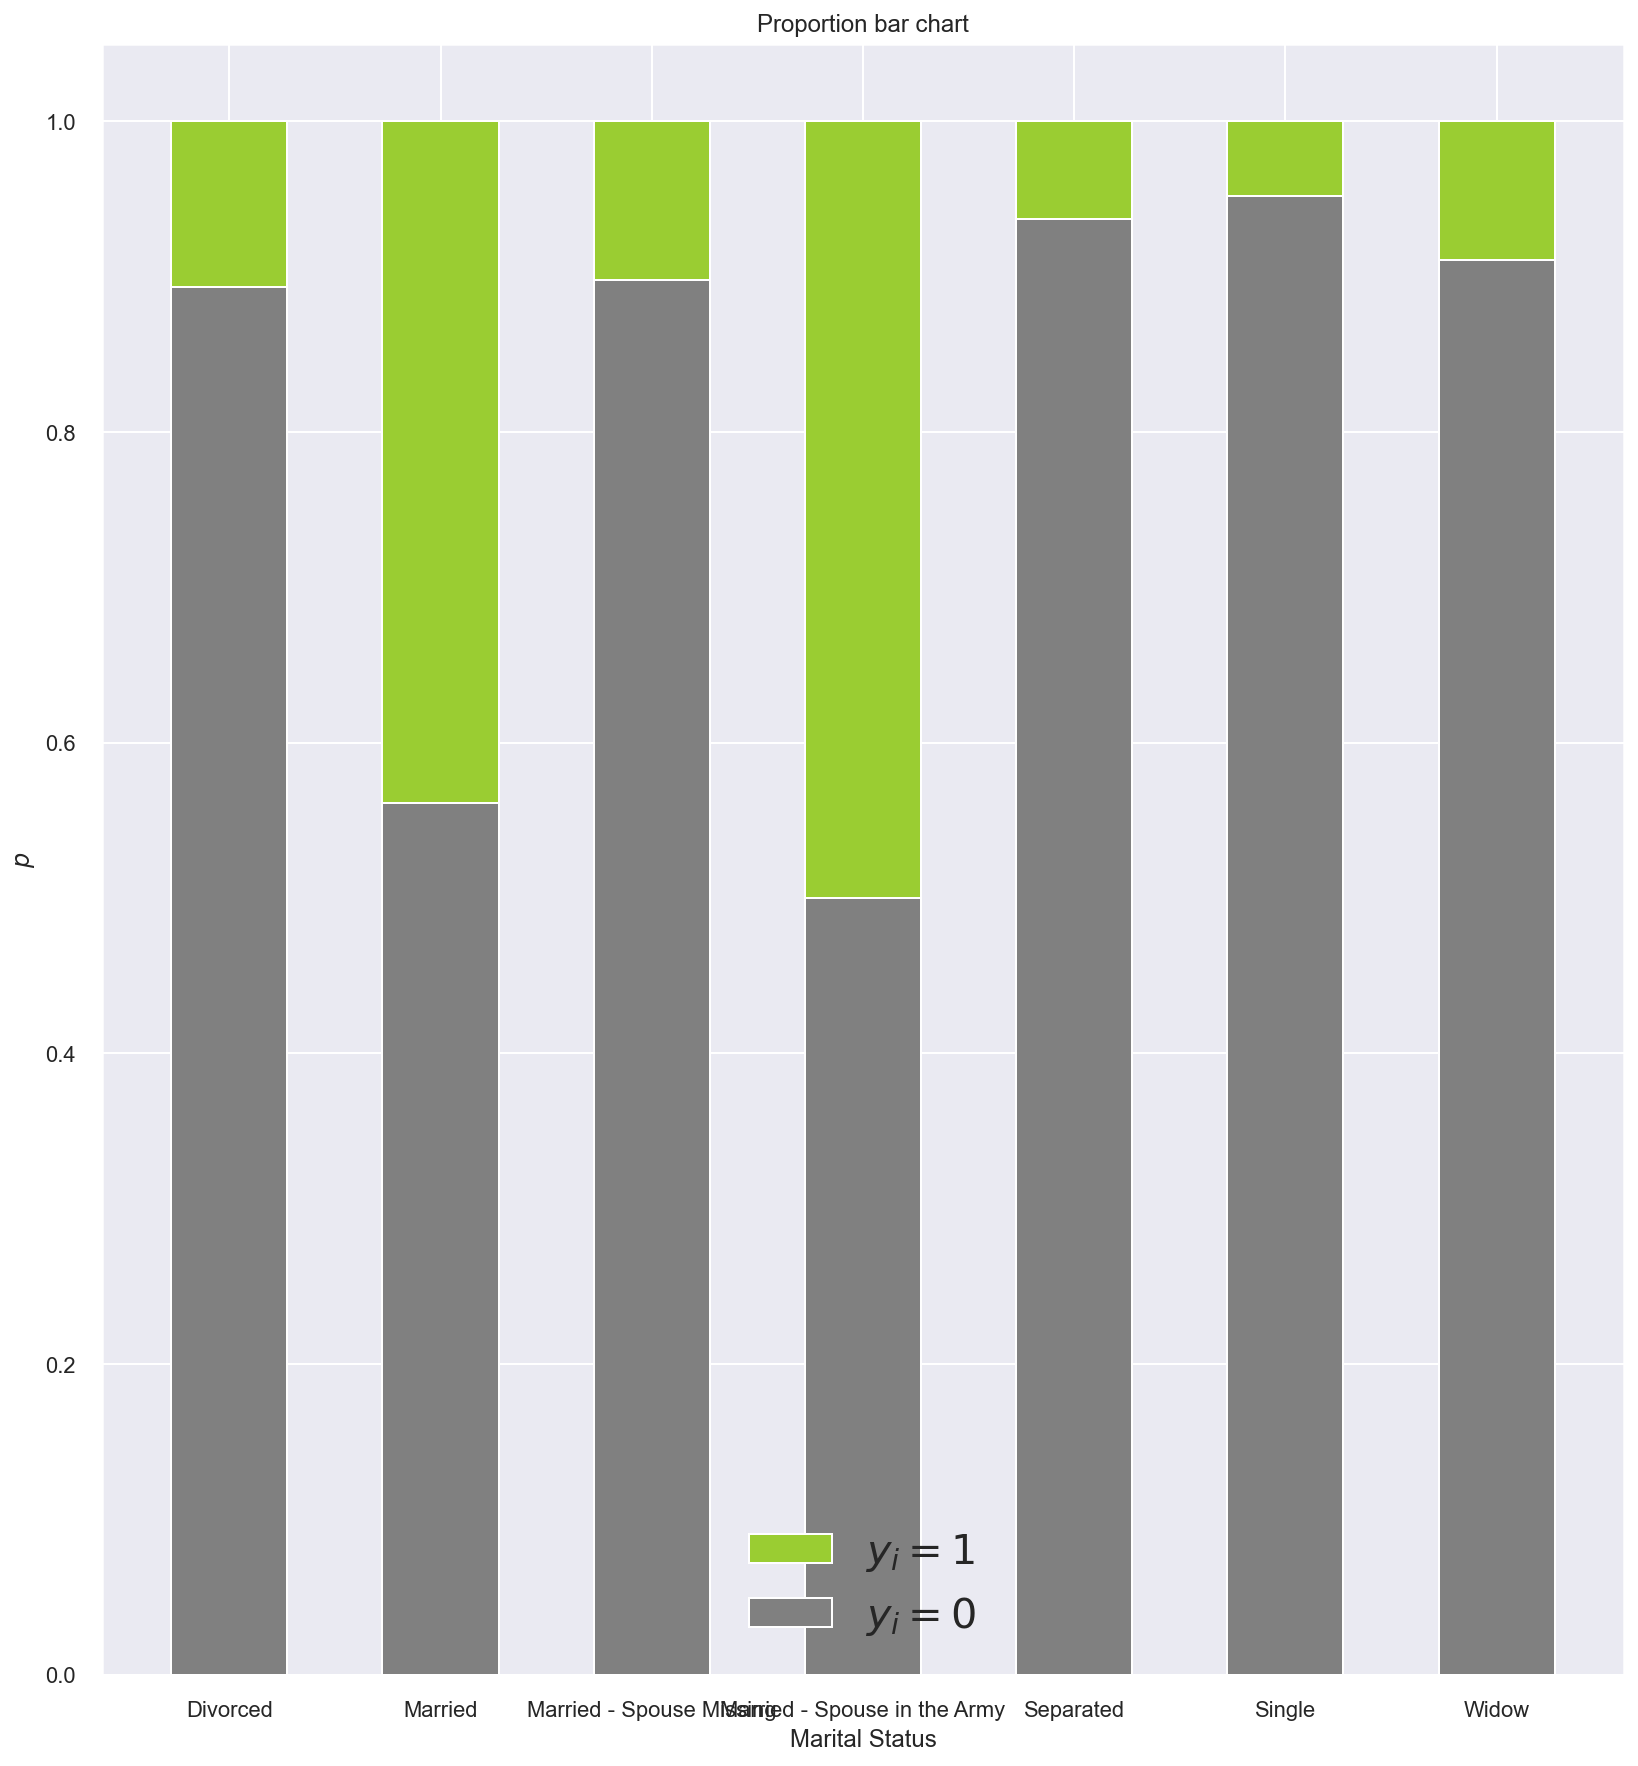

In [153]:
def bar_charts_categorical(df, feature, target):
    cont_tab = pd.crosstab(df[feature], df[target], margins = True)
    categories = cont_tab.index[:-1]
        
    fig = plt.figure(figsize=(30, 15))
  

    # auxiliary data for 122
    obs_pct = np.array([np.divide(cont_tab.iloc[:-1, 0].values, cont_tab.iloc[:-1, 2].values), 
                        np.divide(cont_tab.iloc[:-1, 1].values, cont_tab.iloc[:-1, 2].values)])
      
    plt.subplot(122)
    p1 = plt.bar(categories, obs_pct[0], 0.55, color="gray")
    p2 = plt.bar(categories, obs_pct[1], 0.55, bottom=obs_pct[0], color="yellowgreen")
    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'),fontsize="xx-large")
    plt.title("Proportion bar chart")
    plt.xlabel(feature)
    plt.ylabel("$p$")

    plt.show()
    
bar_charts_categorical(newland_train, "Marital Status", "Income")

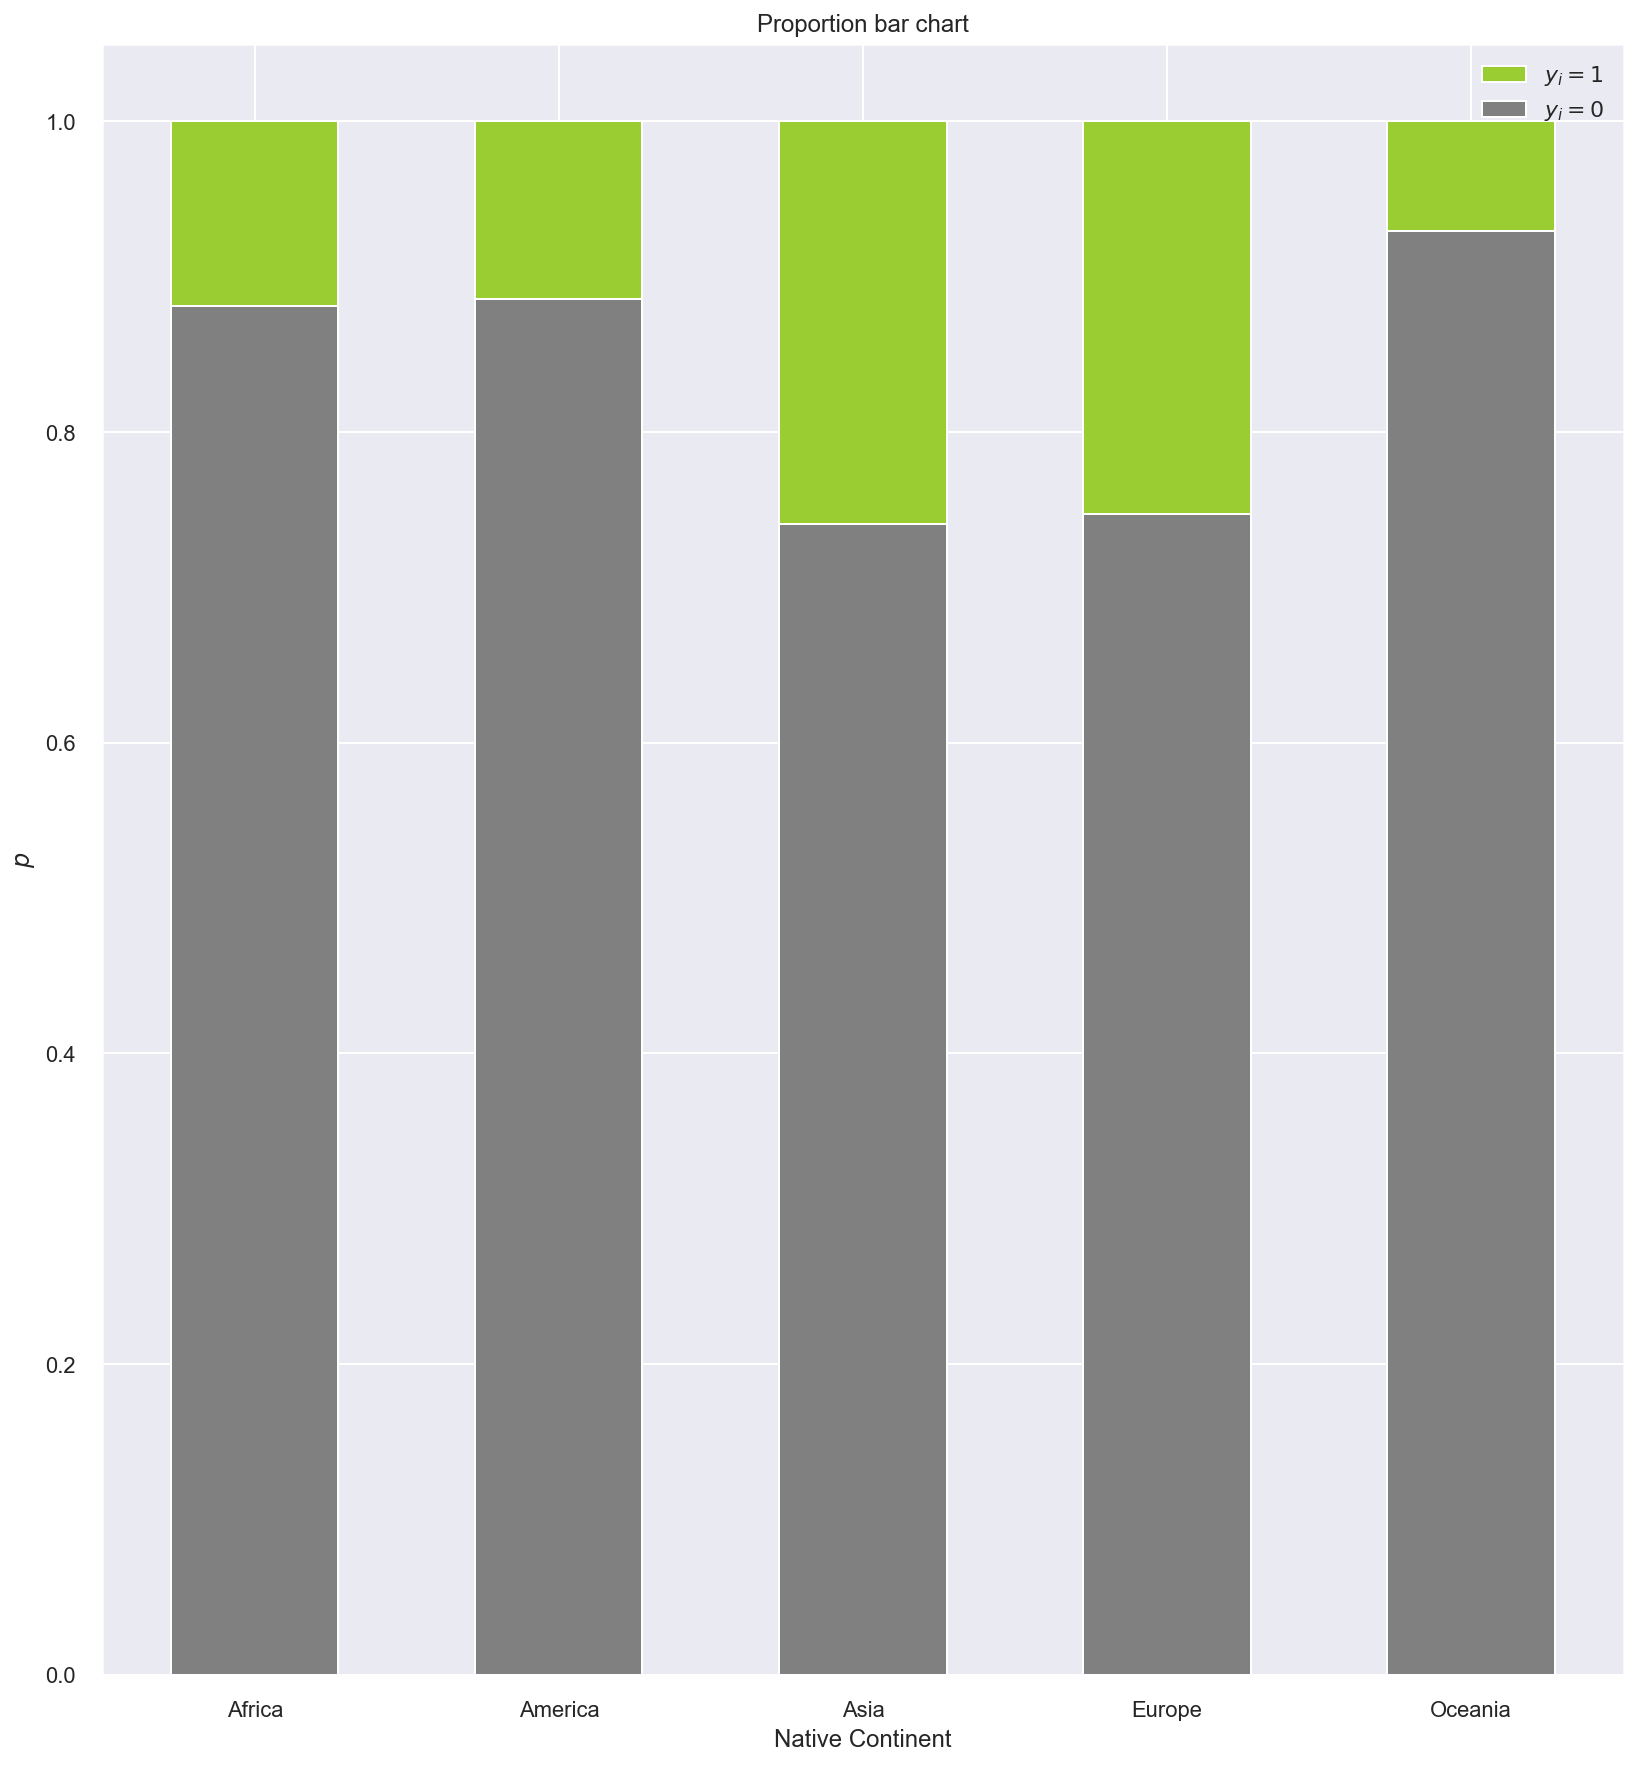

In [147]:
def bar_charts_categorical(df, feature, target):
    cont_tab = pd.crosstab(df[feature], df[target], margins = True)
    categories = cont_tab.index[:-1]
        
    fig = plt.figure(figsize=(30, 15))
  

    # auxiliary data for 122
    obs_pct = np.array([np.divide(cont_tab.iloc[:-1, 0].values, cont_tab.iloc[:-1, 2].values), 
                        np.divide(cont_tab.iloc[:-1, 1].values, cont_tab.iloc[:-1, 2].values)])
      
    plt.subplot(122)
    p1 = plt.bar(categories, obs_pct[0], 0.55, color="gray")
    p2 = plt.bar(categories, obs_pct[1], 0.55, bottom=obs_pct[0], color="yellowgreen")
    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'))
    plt.title("Proportion bar chart")
    plt.xlabel(feature)
    plt.ylabel("$p$")

    plt.show()
    
bar_charts_categorical(newland_train, "Native Continent", "Income")

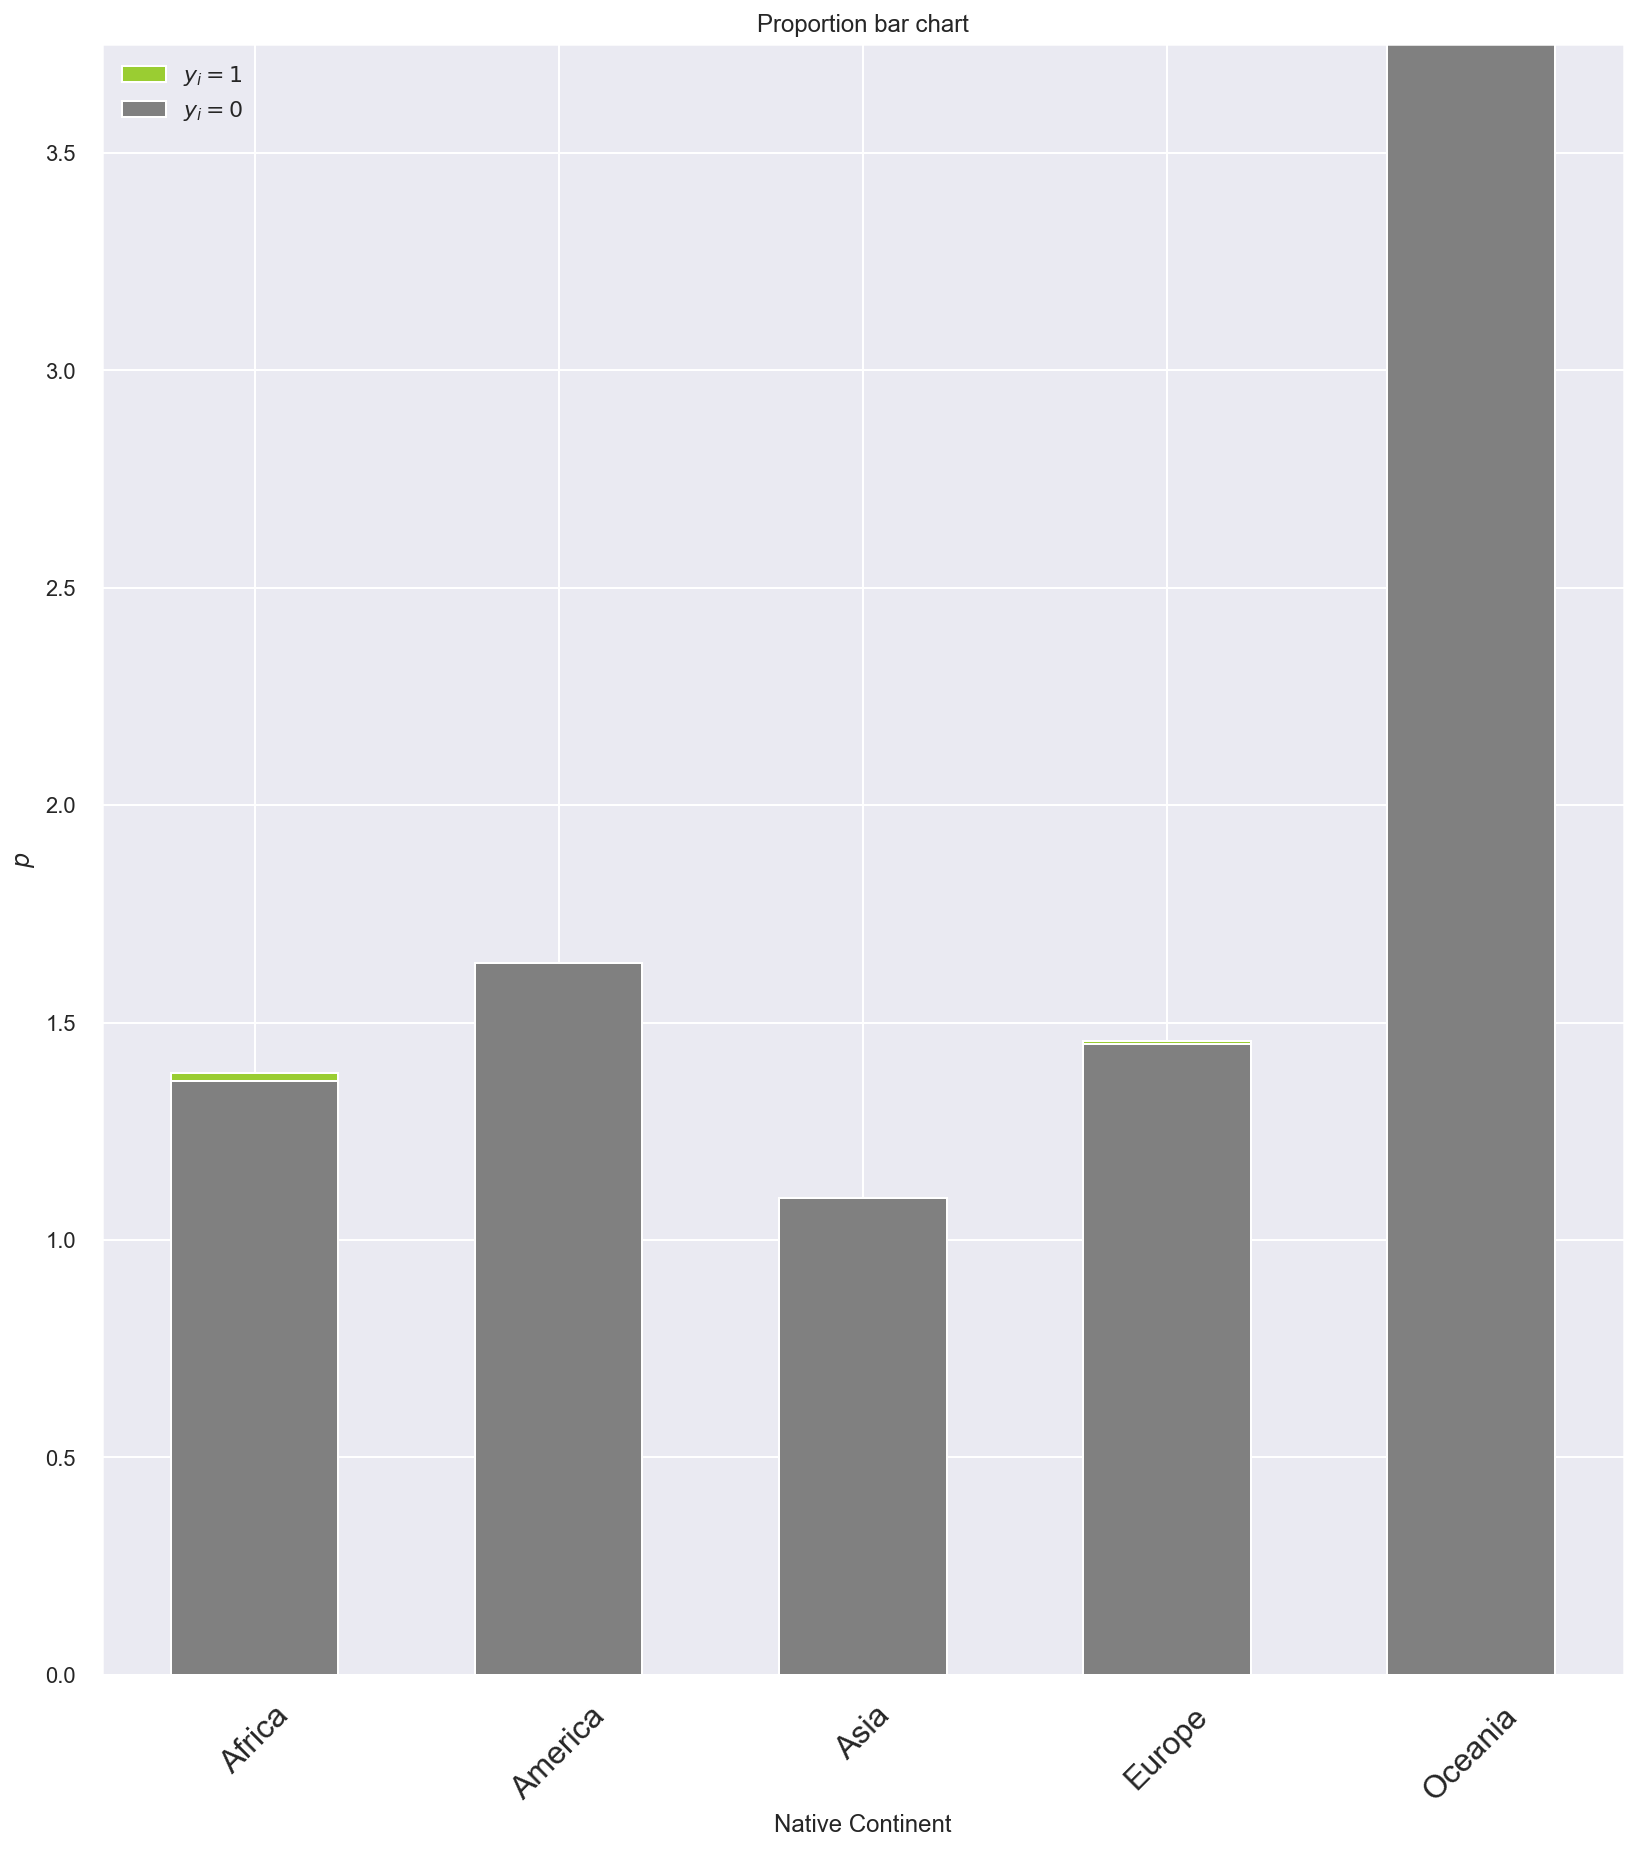

In [159]:
def bar_charts_categorical(df, feature, target):
    cont_tab = pd.crosstab(df[feature], df[target], margins = True)
    categories = cont_tab.index[:-1]
        
    fig = plt.figure(figsize=(30, 15))
  

    # auxiliary data for 122
    obs_pct = np.array([np.divide(cont_tab.iloc[:-1, 0].values, cont_tab.iloc[:-1, 2].values), 
                        np.divide(cont_tab.iloc[:-1, 1].values, cont_tab.iloc[:-1, 2].values)])
      
    plt.subplot(122)
    p1 = plt.bar(categories, obs_pct[0], 0.55, color="gray")
    p2 = plt.bar(categories, obs_pct[1], 0.55, bottom=obs_pct[0], color="yellowgreen")
    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'))
    plt.title("Proportion bar chart")
    plt.xlabel(feature)
    plt.ylabel("$p$")
    plt.xticks(fontsize=16, rotation=45)

    plt.show()
    
bar_charts_categorical(newland_train, "Native Continent", "Employment Sector")

In [ ]:
#all the categorical variables 

In [174]:
metric_features = ['Years of Education', 'Working Hours per week',"Income", "Age"]
non_metric_features = newland_train.columns.drop(metric_features).to_list()
print(non_metric_features)

KeyError: "['IncomeAge'] not found in axis"

In [21]:
from itertools import product
from pandas_profiling import ProfileReport

In [ ]:
profile = ProfileReport(
newland_train,
title='Newland_Profiling',
correlations={
"pearson": {"calculate": True},
"spearman": {"calculate": False},
"kendall": {"calculate": False},
"phi_k": {"calculate": False},
"cramers": {"calculate": False},
},
)

In [ ]:
profile.to_notebook_iframe()

In [11]:
#from sklearn import preprocessing
#from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder

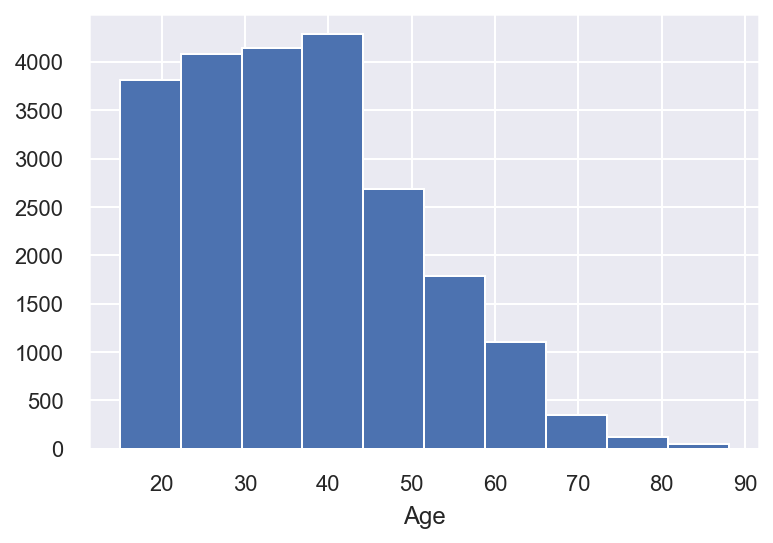

In [27]:
# Age Histogram
plt.hist(newland_train["Age"], bins=10)  # mess around with the bins
plt.title("Age", y=-0.2)

plt.show()

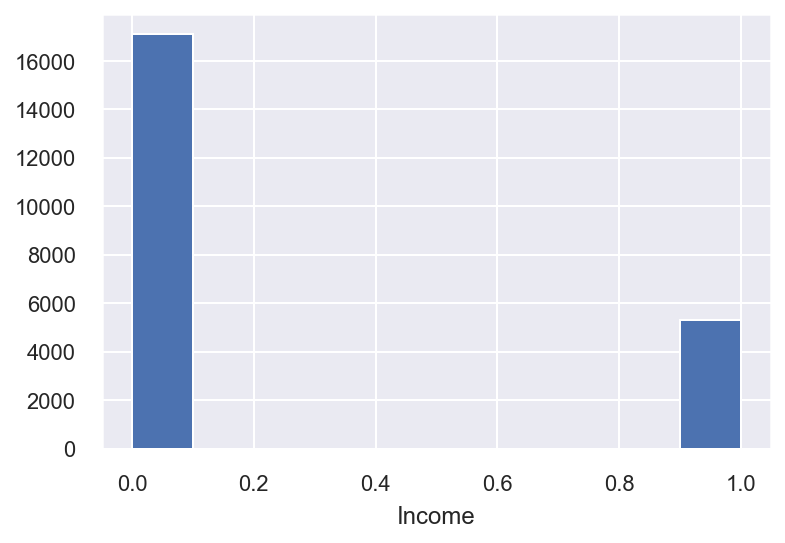

In [28]:
# Income Histogram (better a scatter plot or pie chart)
plt.hist(newland_train["Income"], bins=10)  # mess around with the bins
plt.title("Income", y=-0.2)

plt.show()

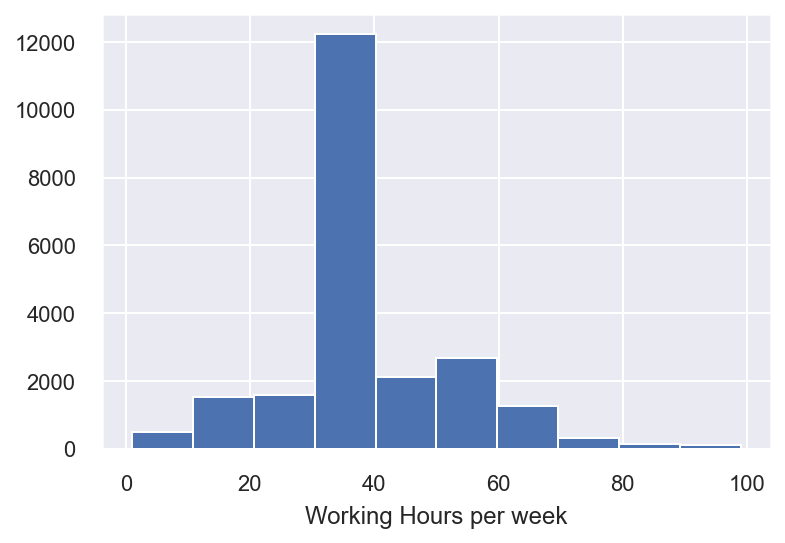

In [30]:
# Working hours per Week Histogram (better a scatter plot or pie chart)
plt.hist(newland_train["Working Hours per week"], bins=10)  # mess around with the bins
plt.title("Working Hours per week", y=-0.2)

plt.show()

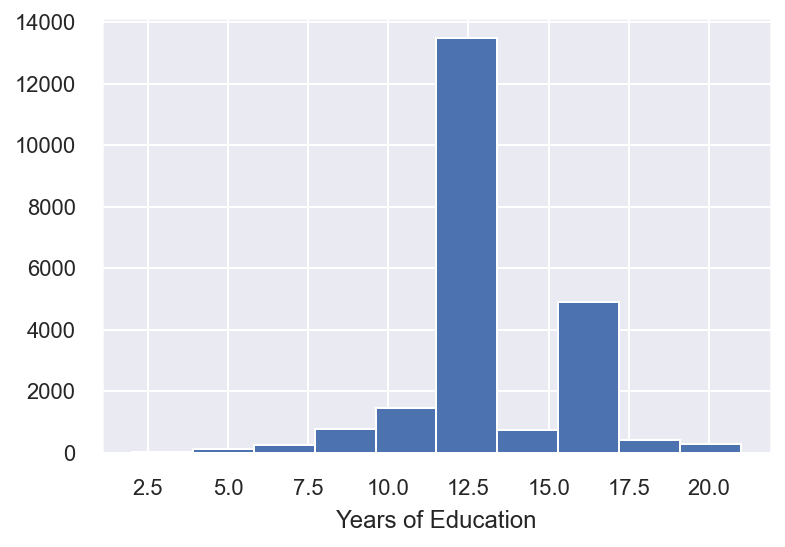

In [33]:
# Years of Education Histogram (better a scatter plot or pie chart)
plt.hist(newland_train["Years of Education"], bins=10)  # mess around with the bins
plt.title("Years of Education", y=-0.2)

plt.show()

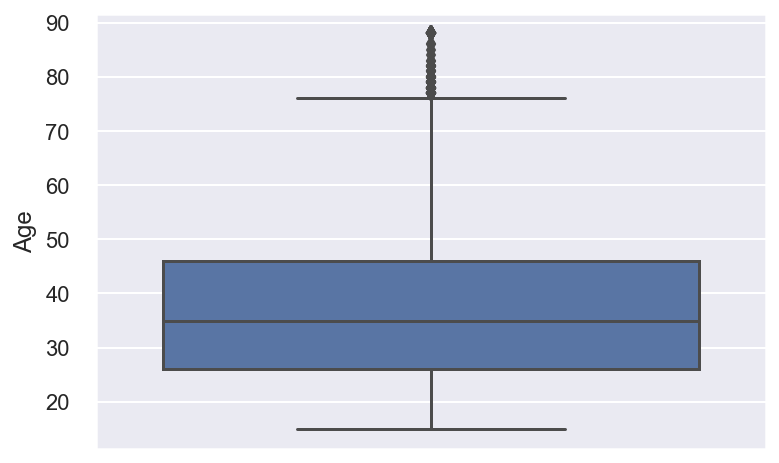

In [34]:
# Age Variable Box Plot
sns.boxplot(y=newland_train["Age"])

plt.show()

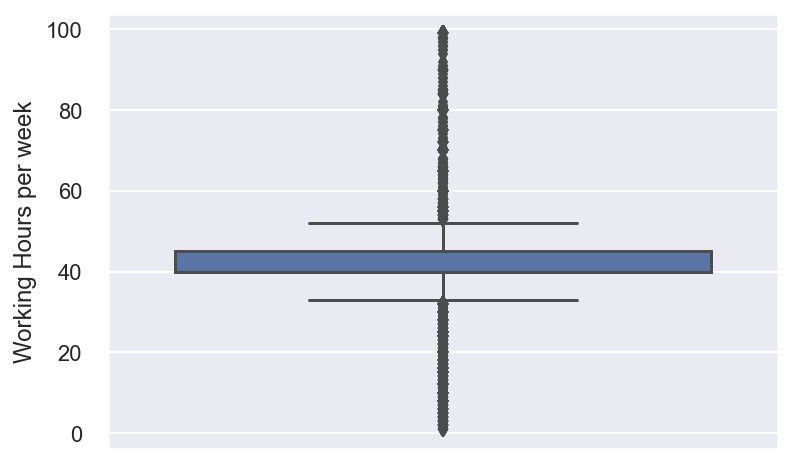

In [36]:
# Working Hours per week Variable Box Plot
sns.boxplot(y=newland_train["Working Hours per week"])

plt.show()

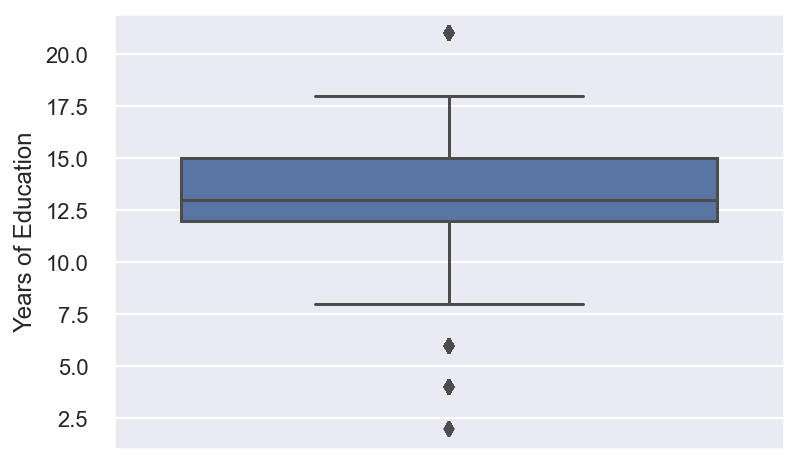

In [37]:
# Years of Education Variable Box Plot
sns.boxplot(y=newland_train["Years of Education"])

plt.show()

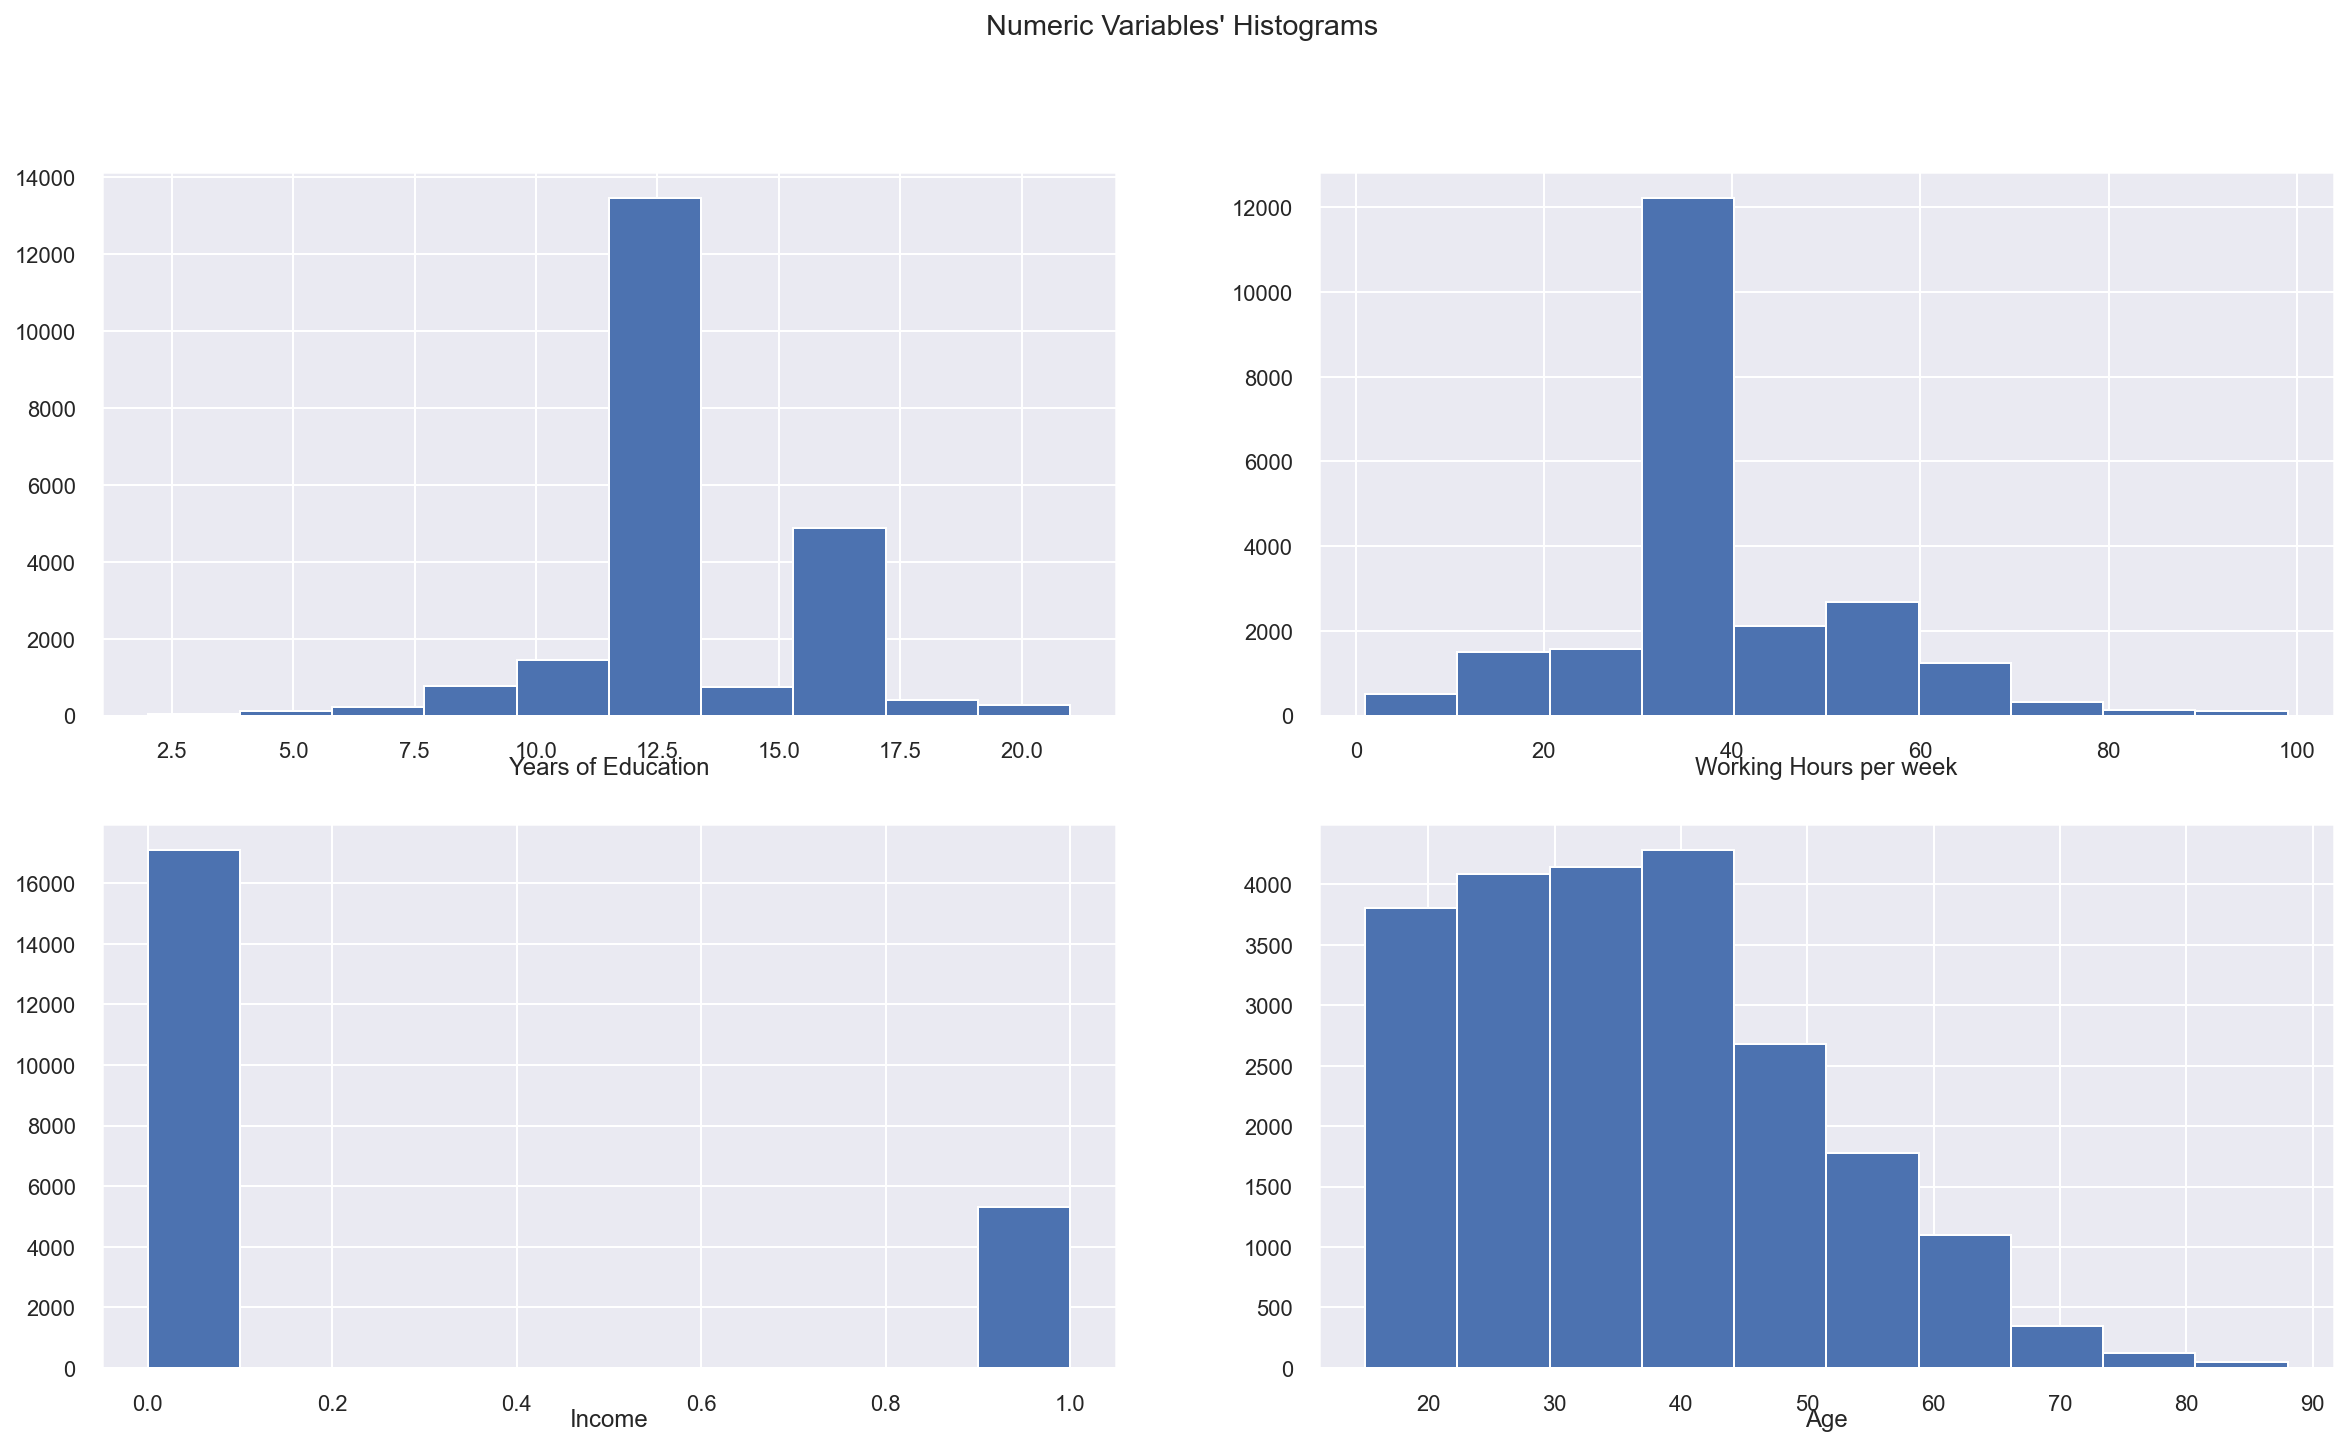

In [40]:
# All Numeric Variables' Histograms in one figure
sns.set()

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    ax.hist(newland_train[feat])
    ax.set_title(feat, y=-0.13)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Histograms"

plt.suptitle(title)

plt.show()

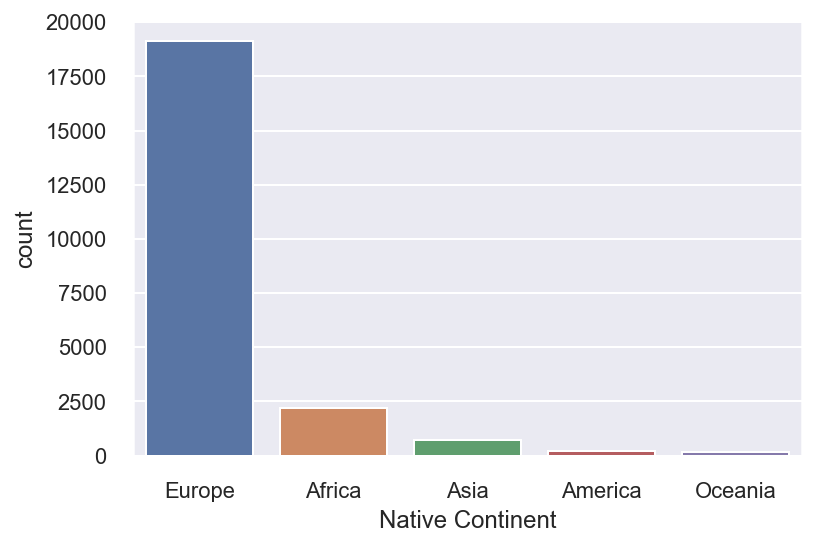

In [55]:
# Single Non-Metric variable bar plot
sns.set() # this resets our formatting defaults
sns.countplot(x=newland_train["Native Continent"])

plt.show()

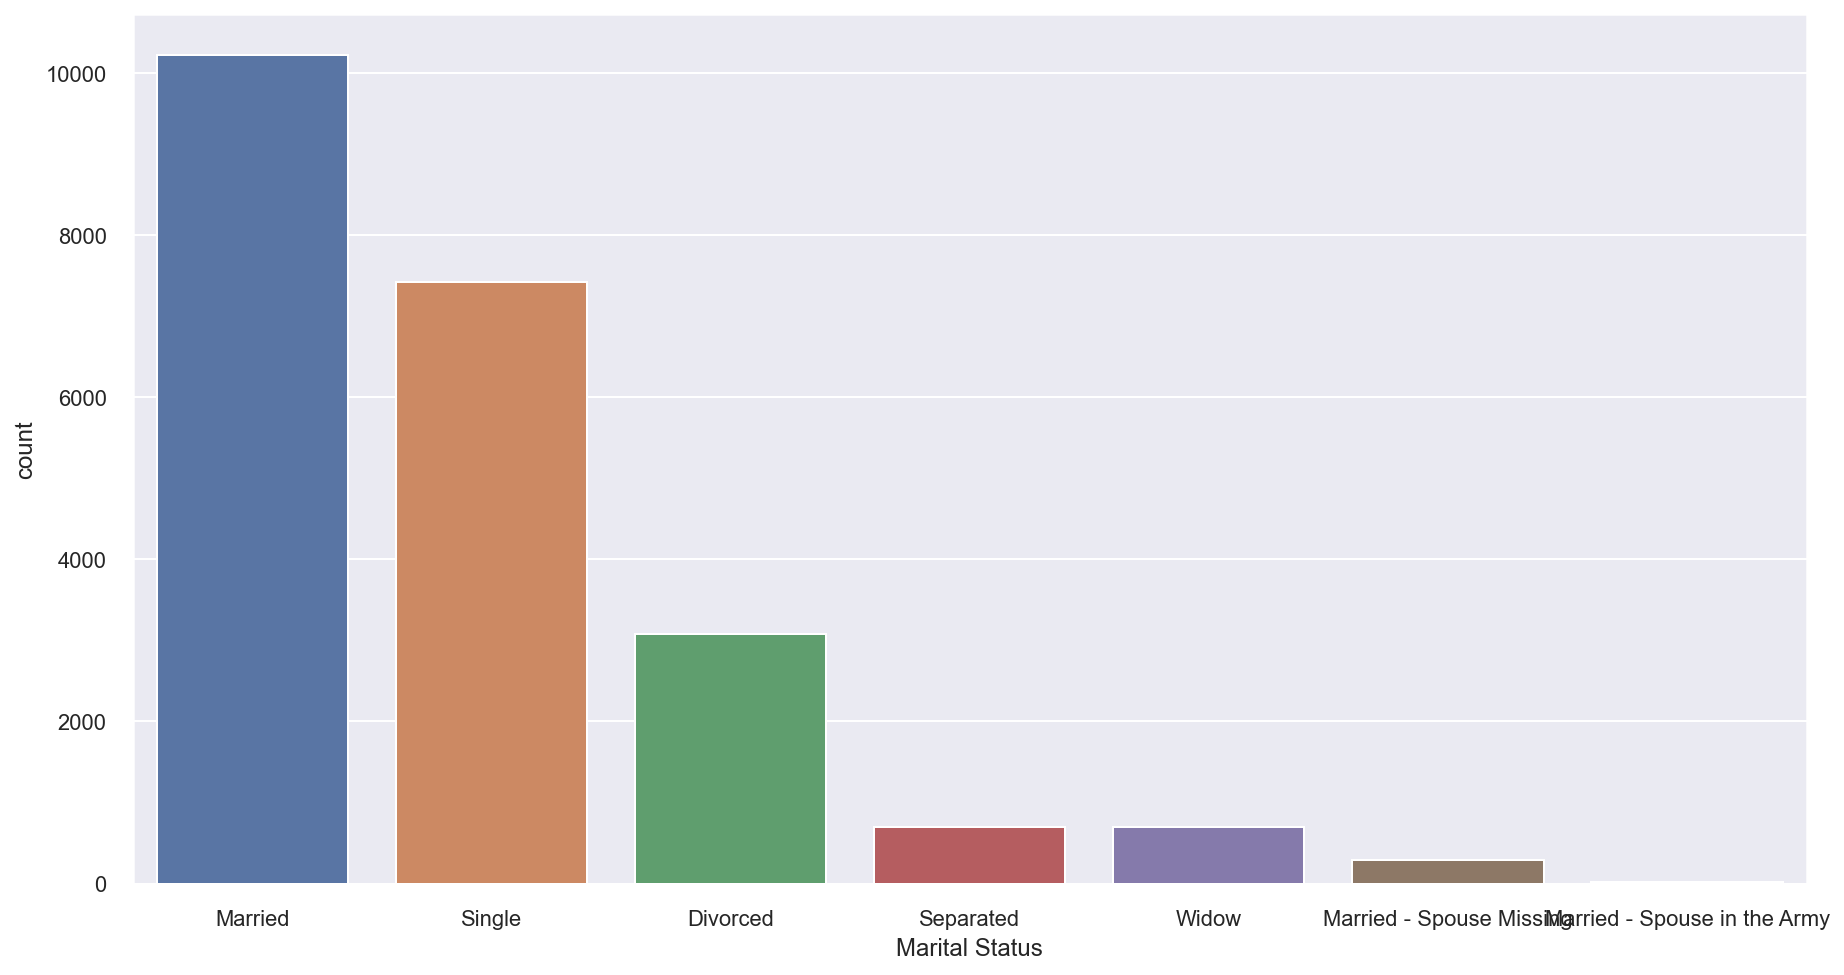

In [113]:
# Marital Status Non-Metric variable bar plot
sns.set() # this resets our formatting defaults
plt.figure(figsize=(15,8))
sns.countplot(x=newland_train["Marital Status"], order = newland_train["Marital Status"].value_counts().index)

plt.show()

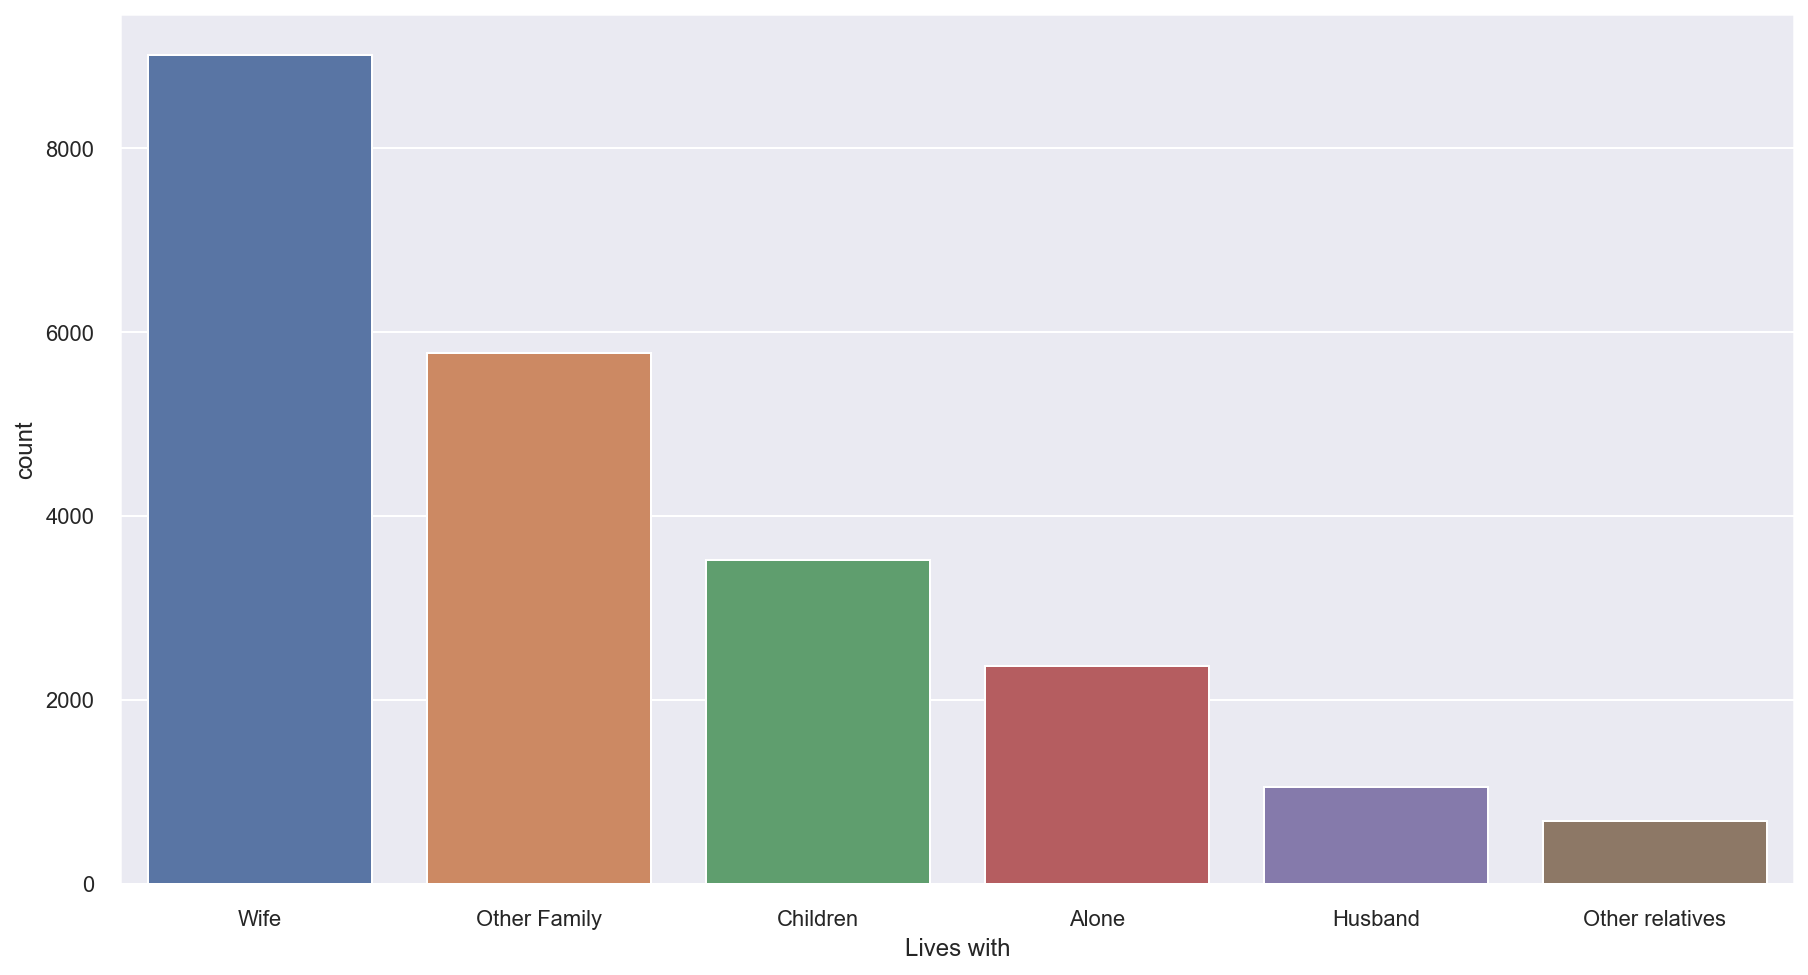

In [112]:
# Lives with Non-Metric variable bar plot
sns.set() # this resets our formatting defaults
plt.figure(figsize=(15,8))
sns.countplot(x=newland_train["Lives with"], order = newland_train["Lives with"].value_counts().index)

plt.show()

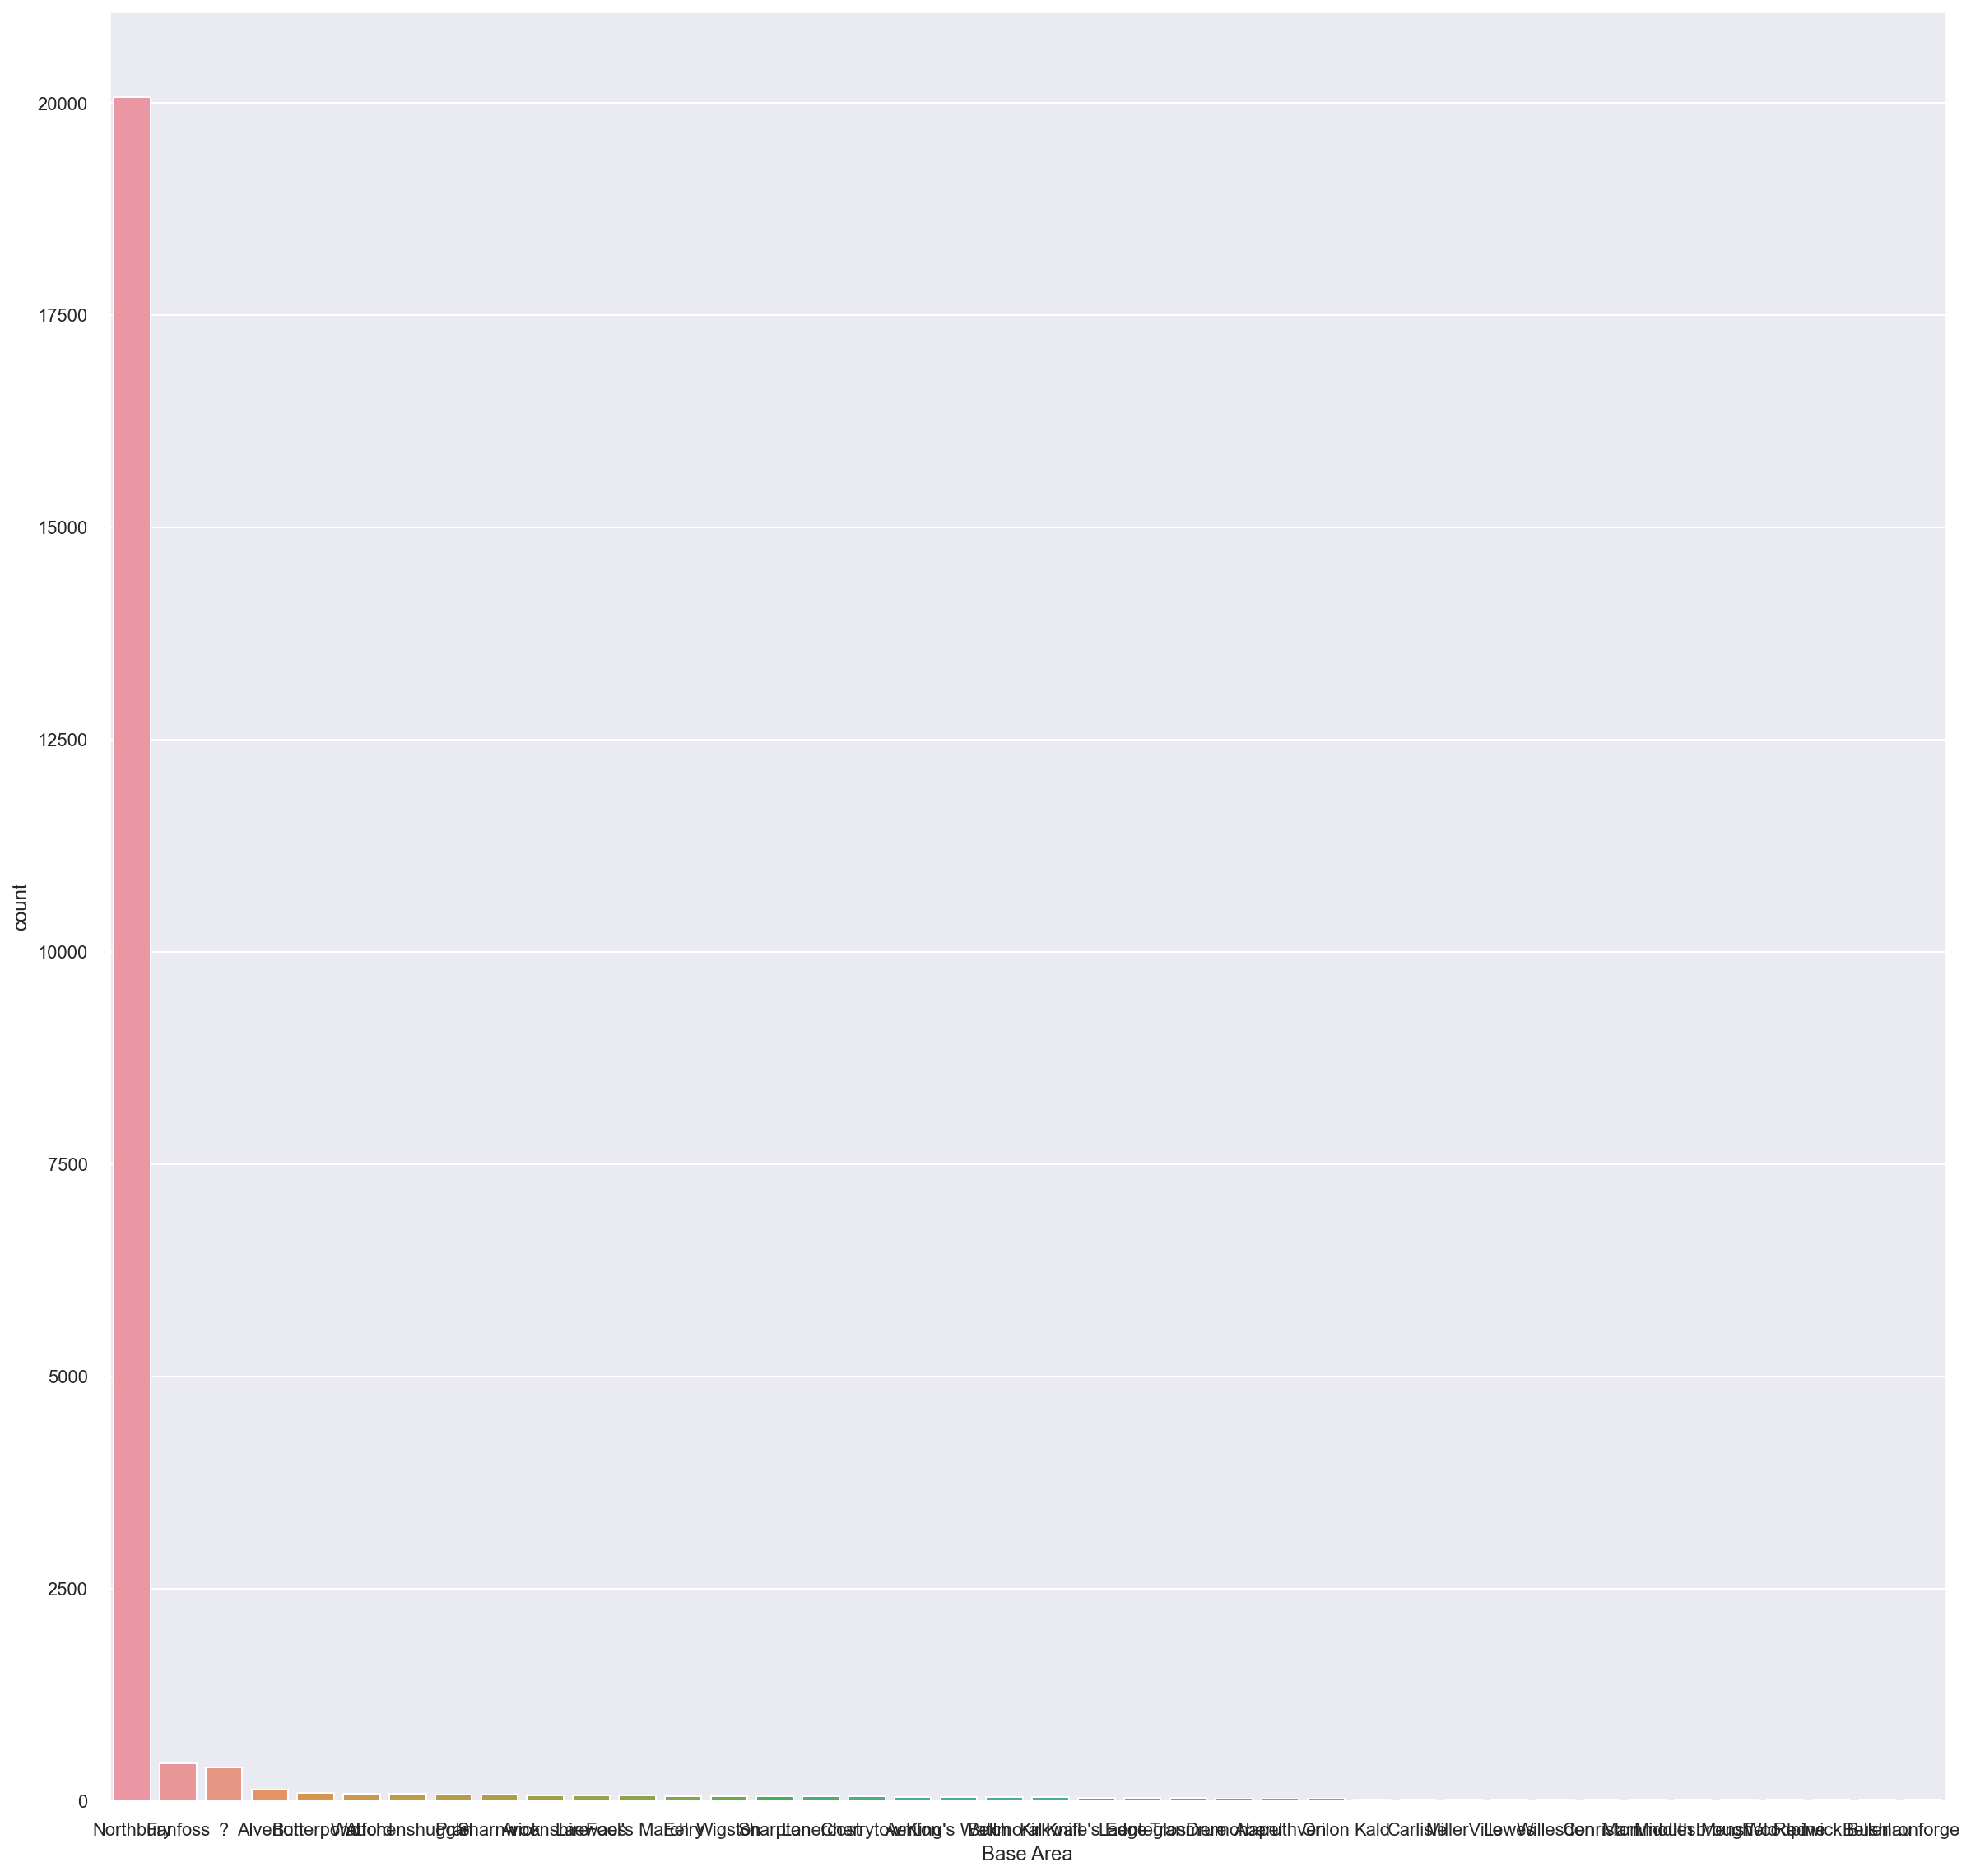

In [116]:
# Base Area Non-Metric variable bar plot
sns.set() # this resets our formatting defaults
plt.figure(figsize=(20,20))
sns.countplot(x=newland_train["Base Area"],order = newland_train["Base Area"].value_counts().index )
plt.show()

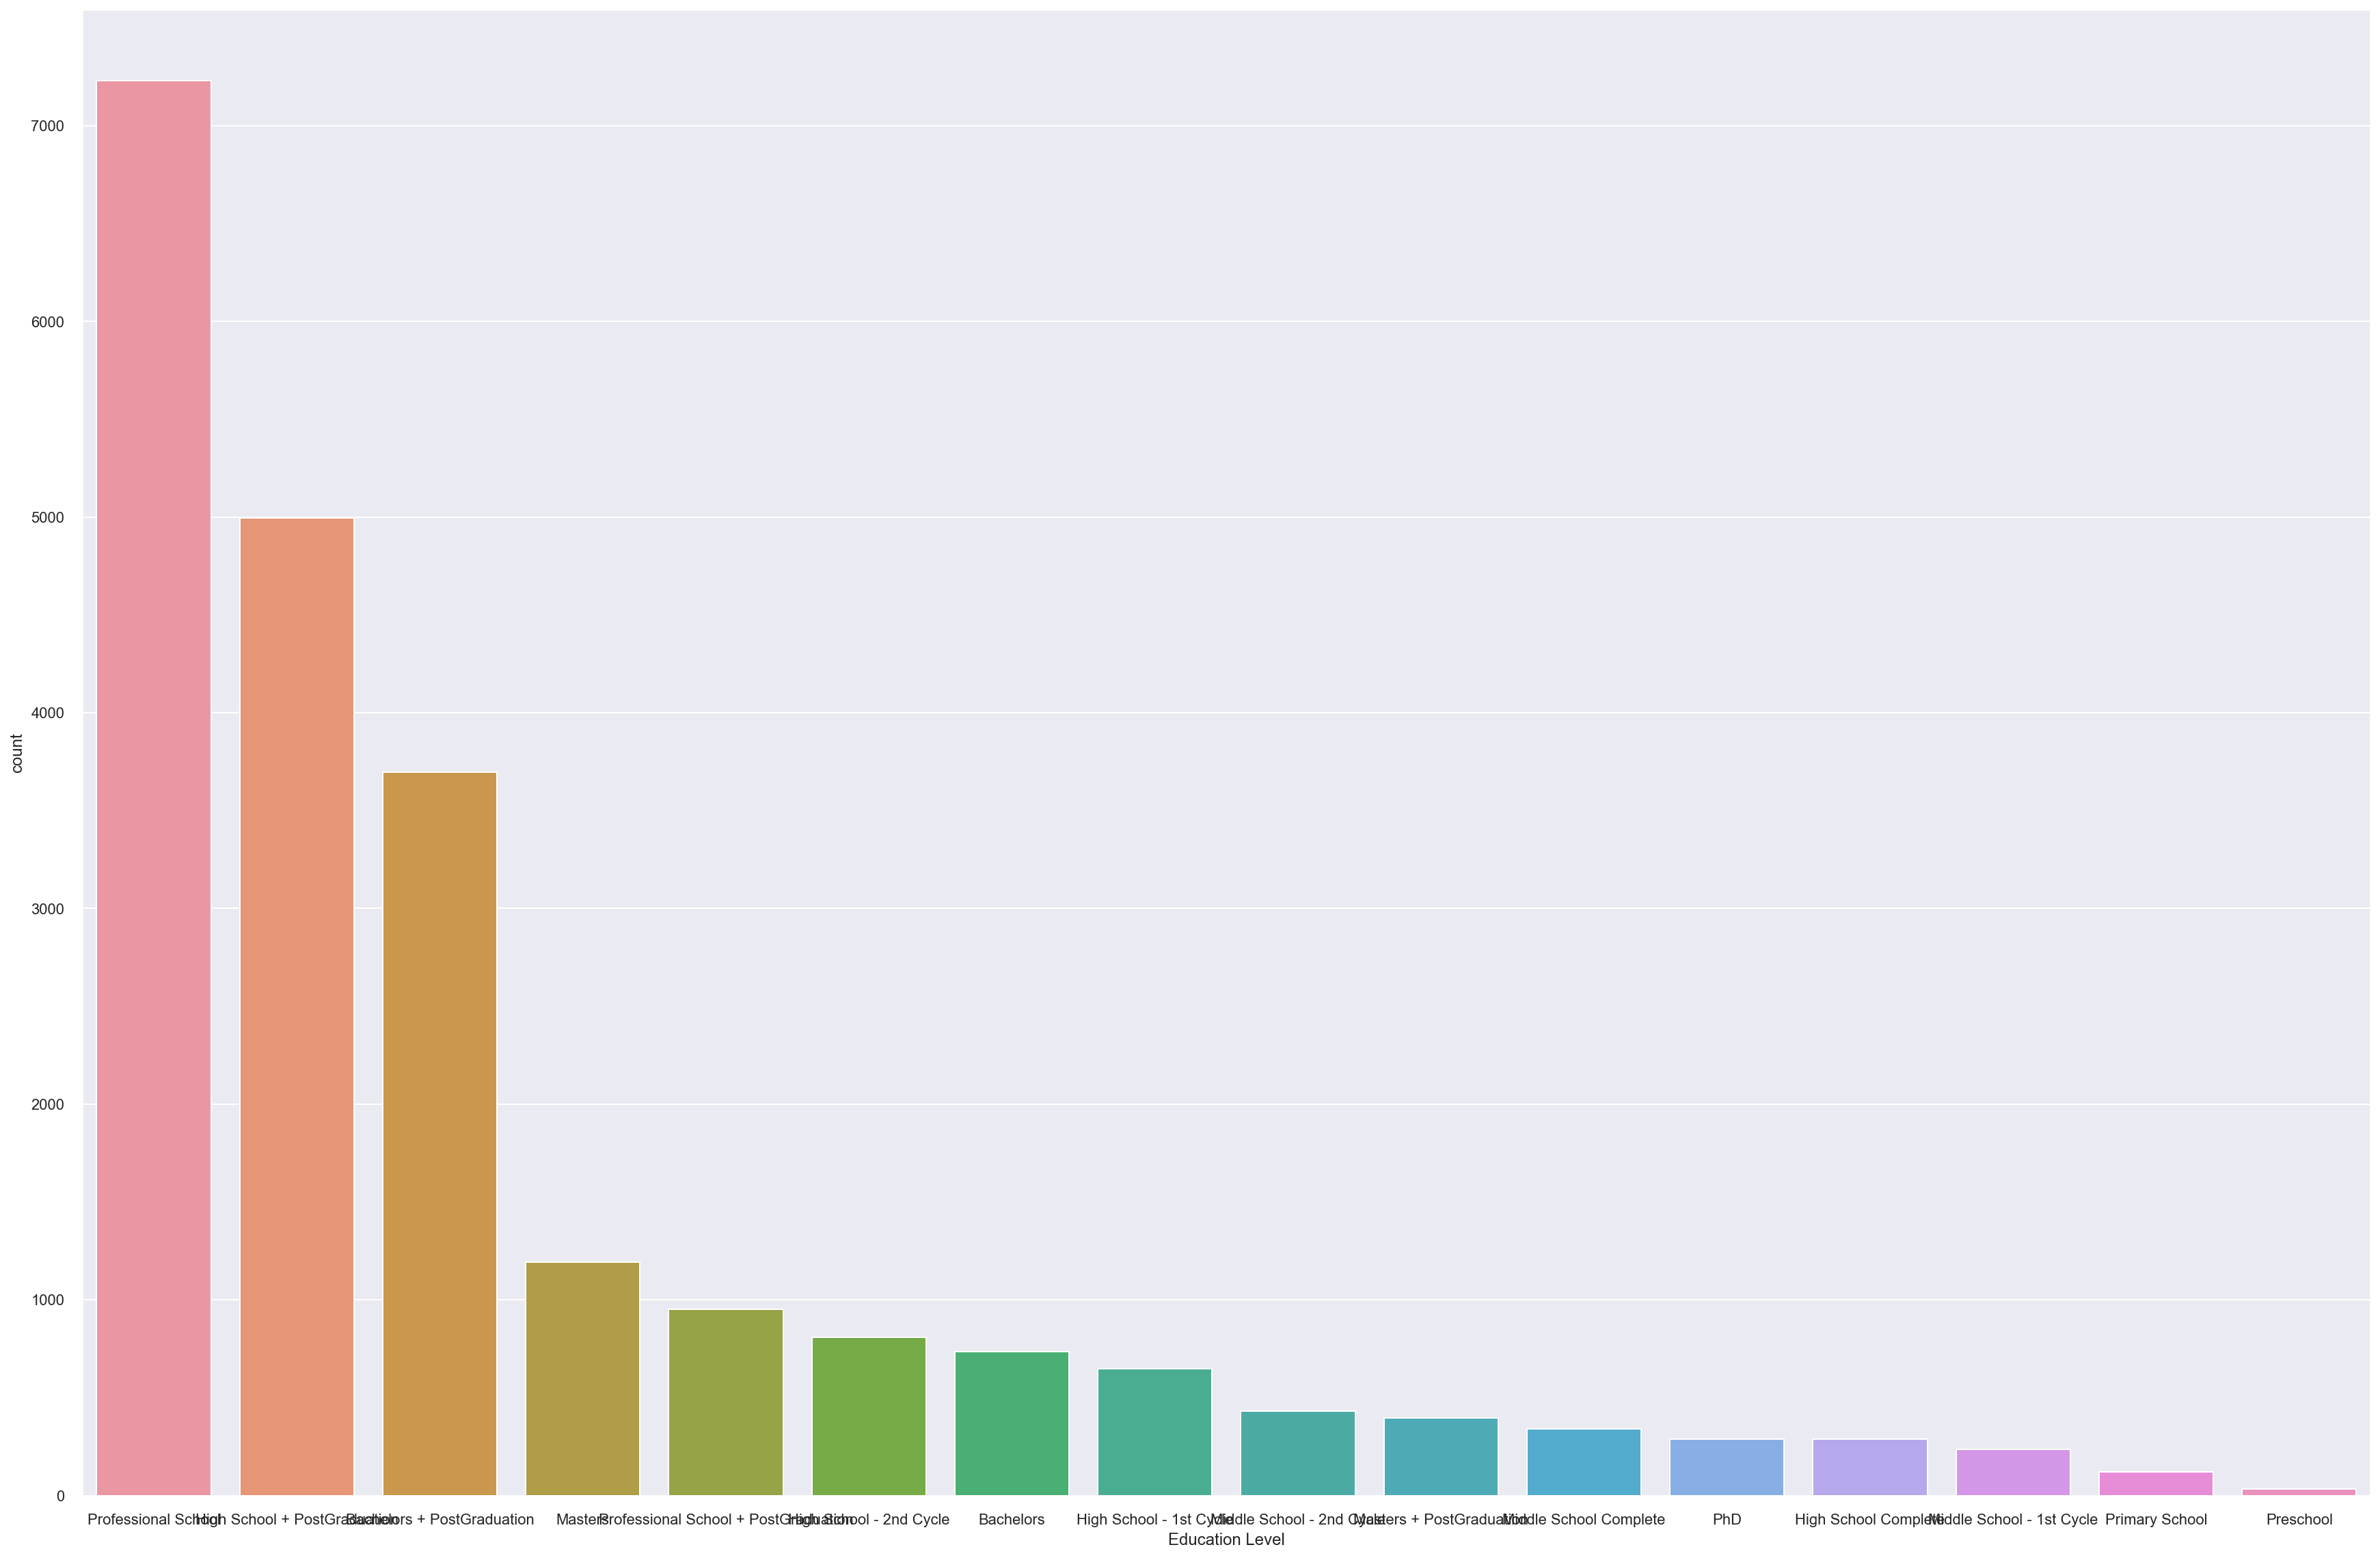

In [117]:
# Education Level Non-Metric variable bar plot
sns.set() # this resets our formatting defaults
plt.figure(figsize=(30,20))
sns.countplot(x=newland_train["Education Level"], order = newland_train["Education Level"].value_counts().index)

plt.show()

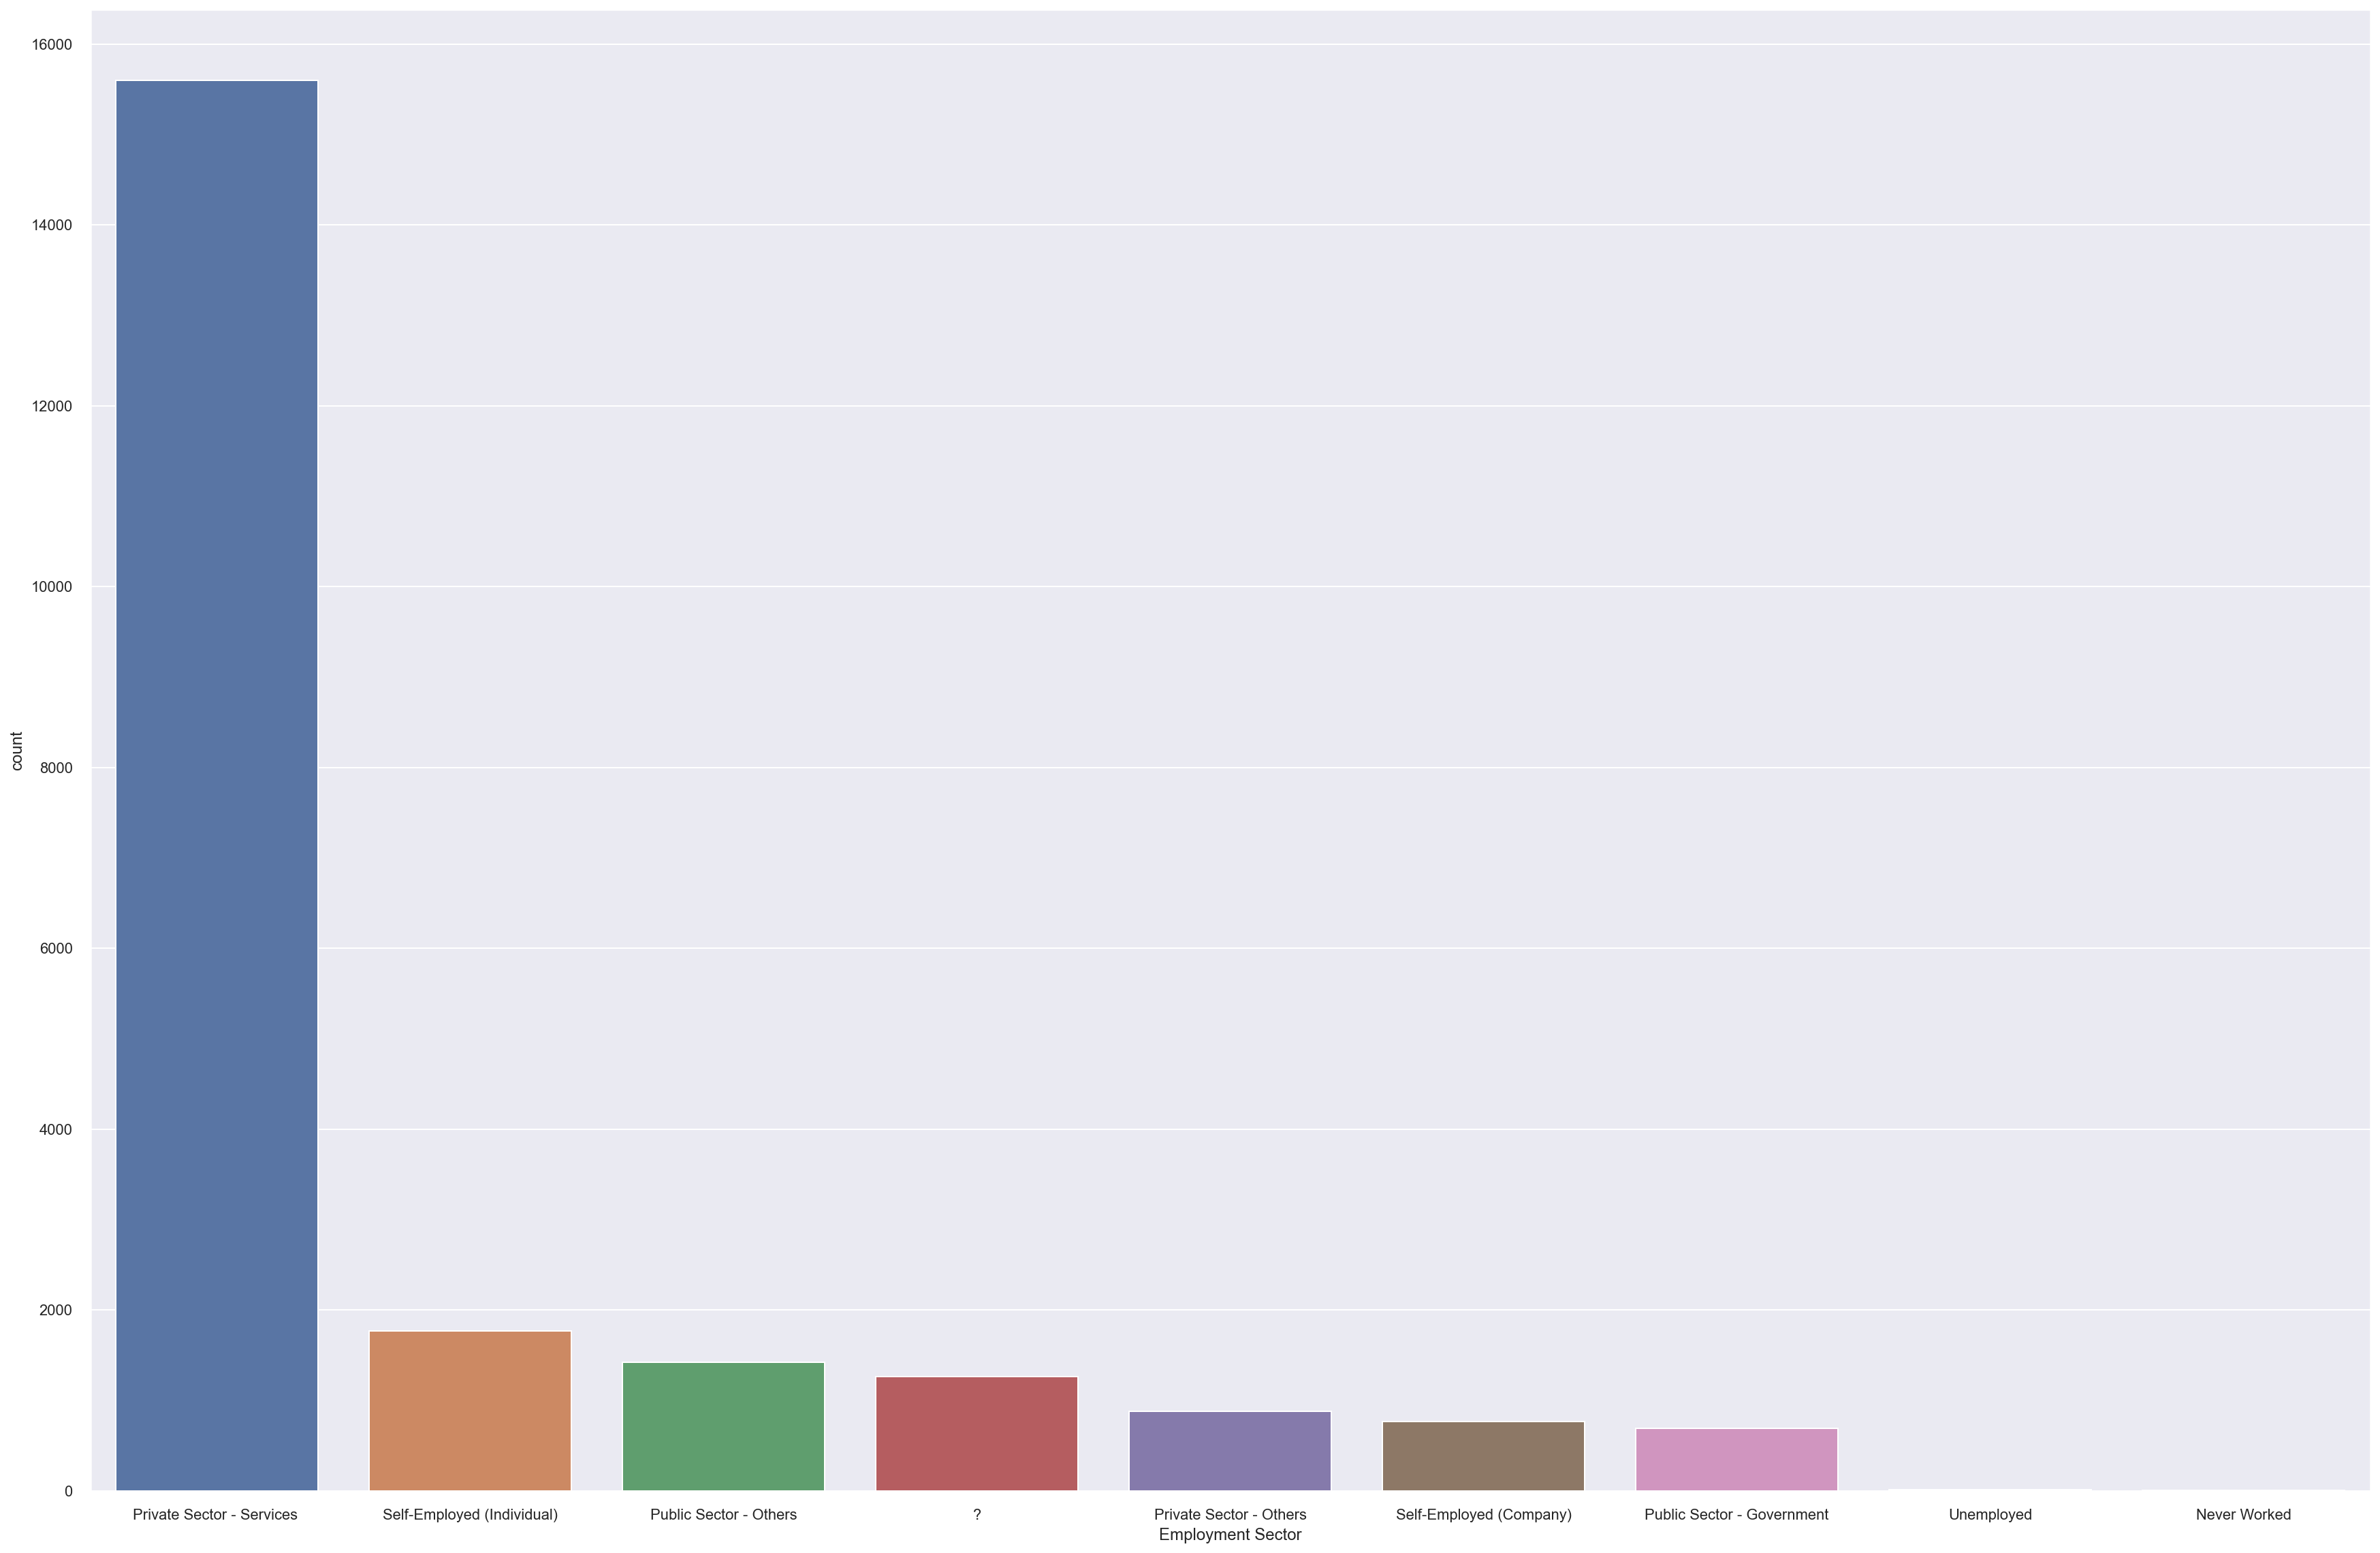

In [118]:
# Employment Sector Non-Metric variable bar plot
sns.set() # this resets our formatting defaults
plt.figure(figsize=(30,20))
sns.countplot(x=newland_train["Employment Sector"], order = newland_train["Employment Sector"].value_counts().index)
plt.show()

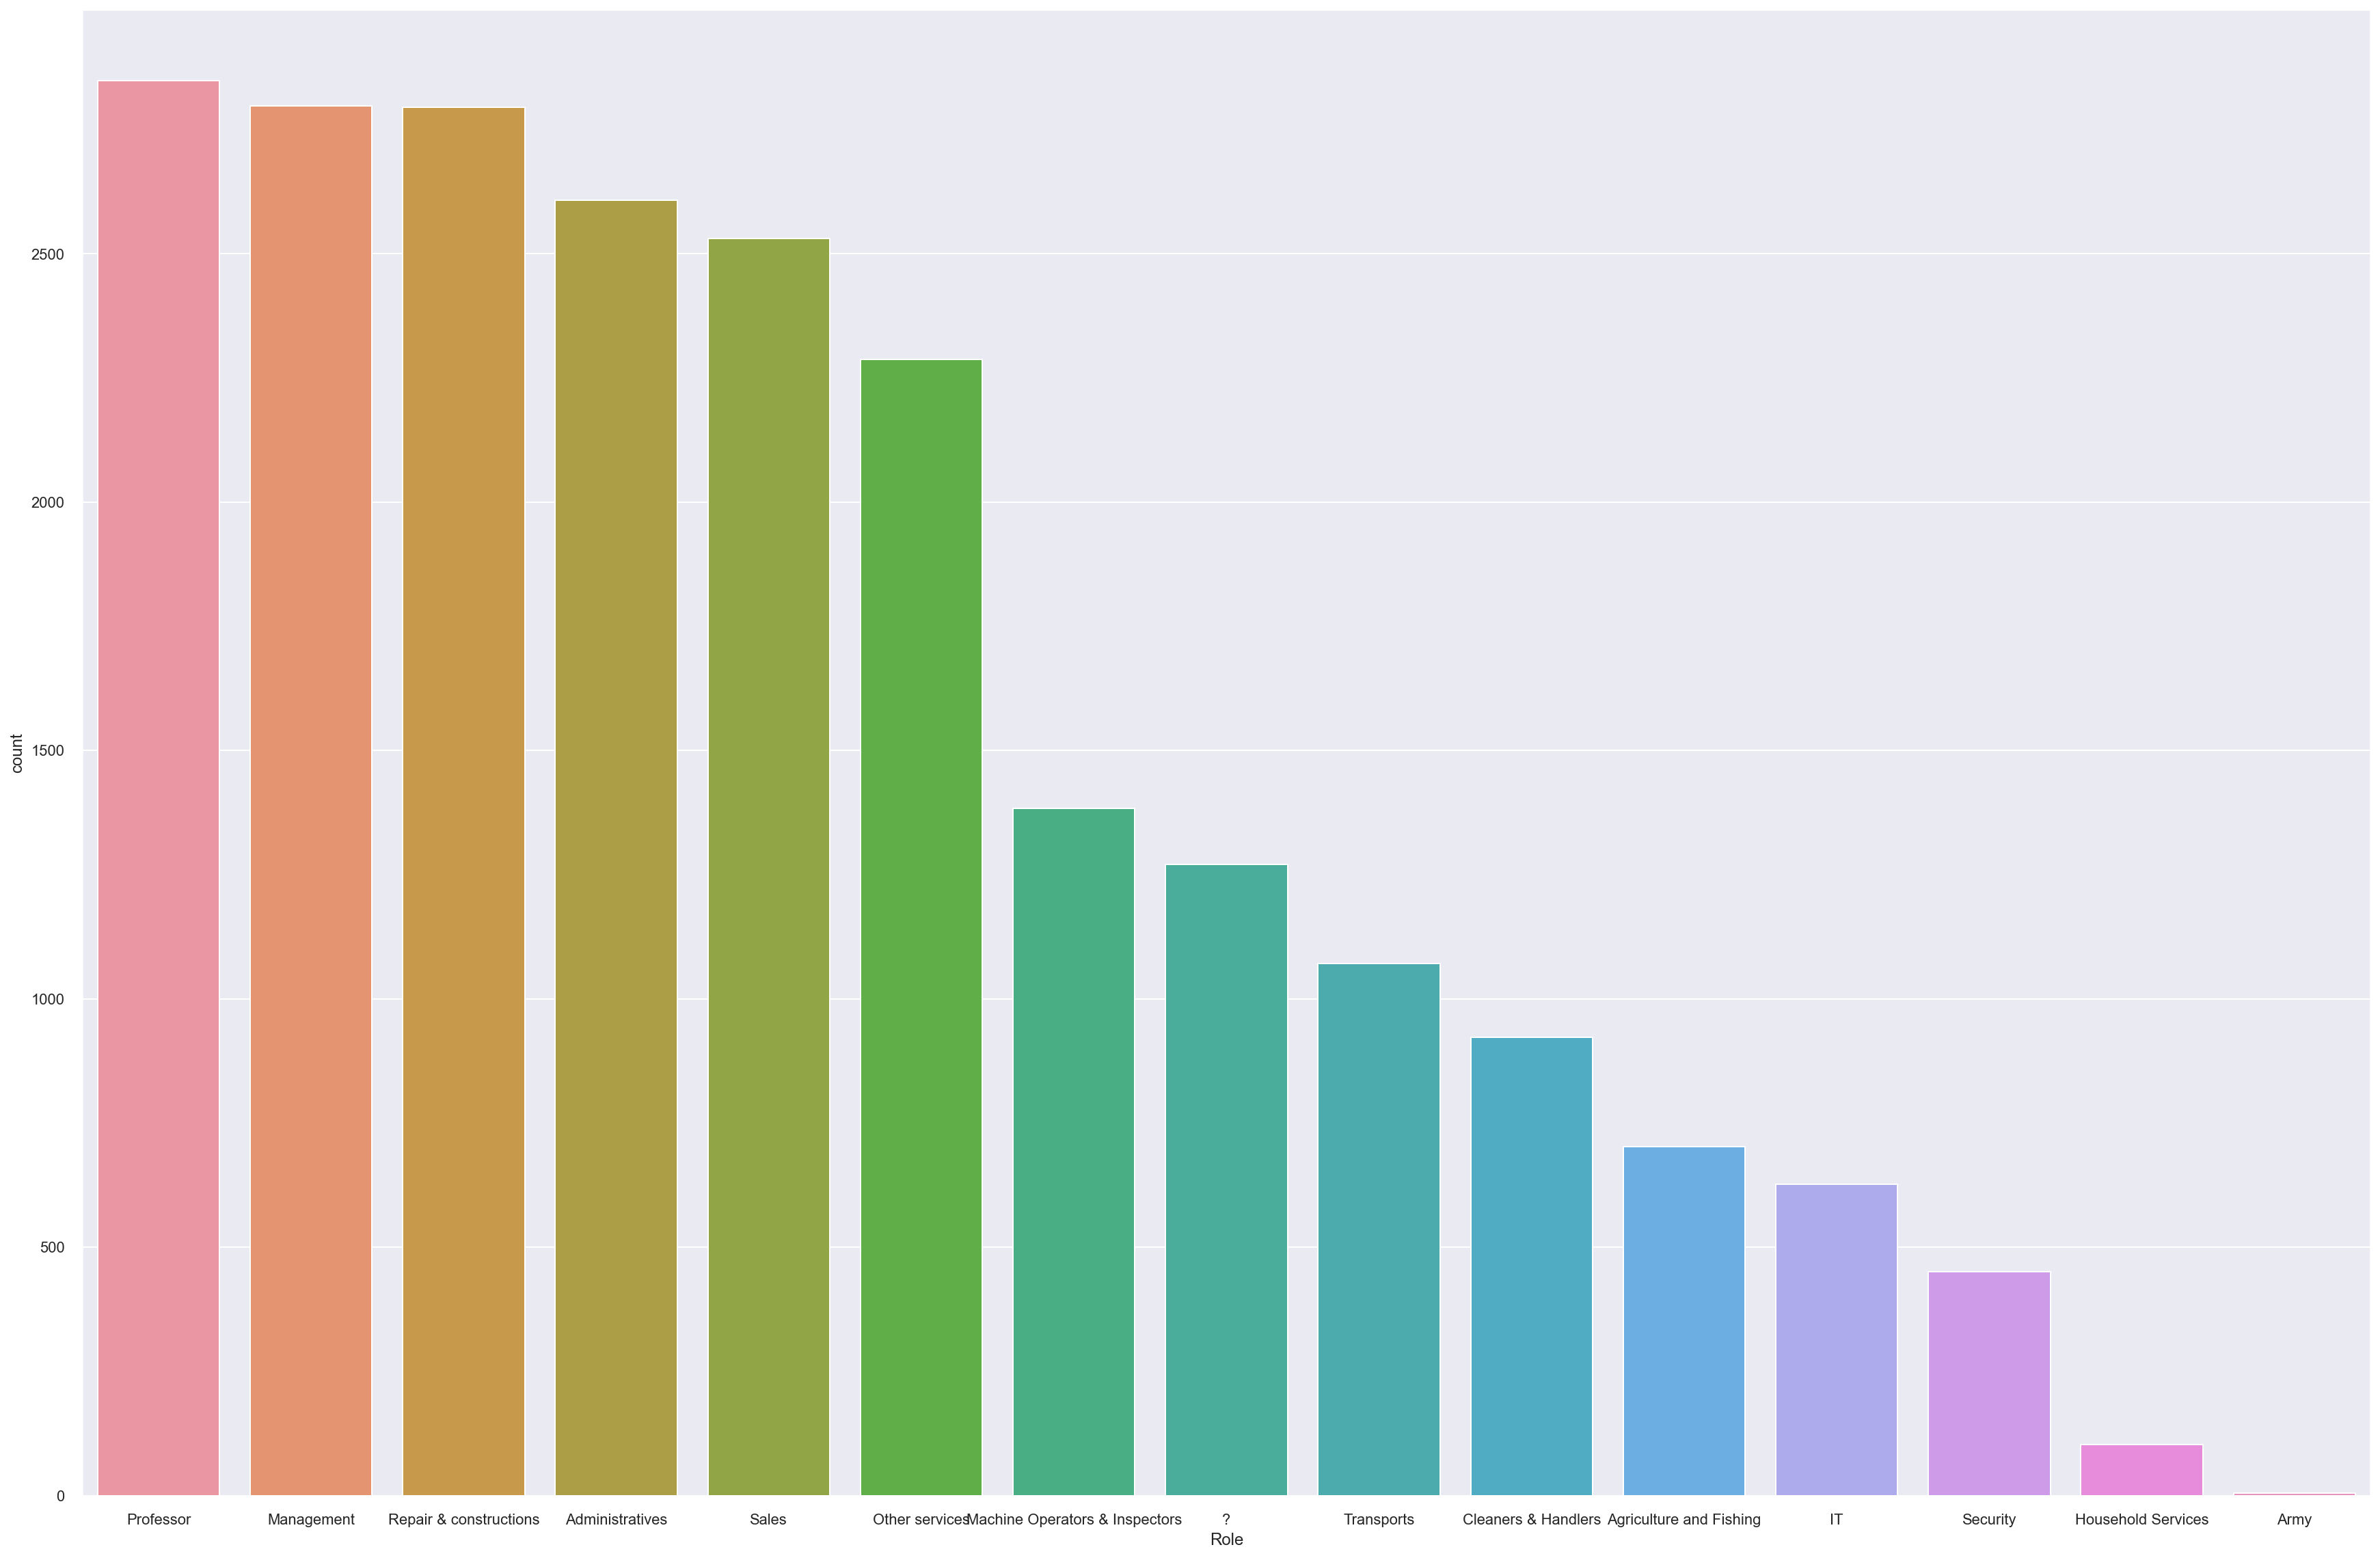

In [119]:
# Role Non-Metric variable bar plot
sns.set() # this resets our formatting defaults
plt.figure(figsize=(30,20))
sns.countplot(x=newland_train["Role"],order = newland_train["Role"].value_counts().index)
plt.show()

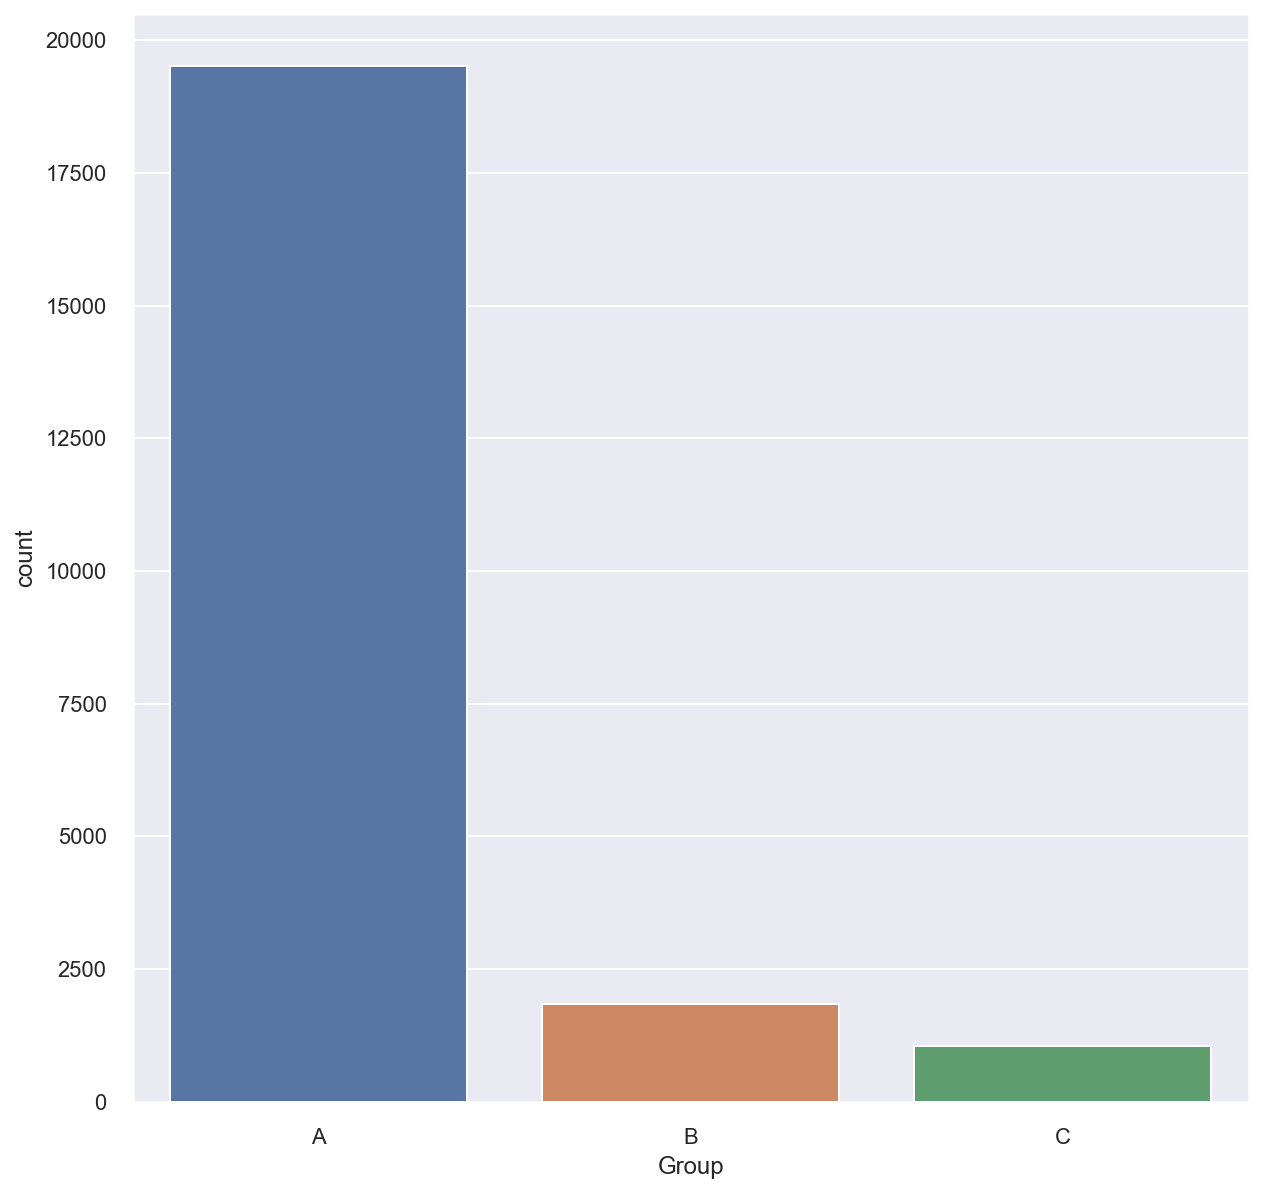

In [120]:
# Group Non-Metric variable bar plot
sns.set() # this resets our formatting defaults
plt.figure(figsize=(10,10))
sns.countplot(x=newland_train["Group"], order = newland_train["Group"].value_counts().index)
plt.show()

In [ ]:
fig_dims = (6, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x = "names", y = "values", ax=ax, data=df)
['Native Continent', 'Marital Status', 'Lives with', 'Base Area', 'Education Level', 'Employment Sector', 'Role', 'Group']

In [164]:
from sklearn.preprocessing import OrdinalEncoder

In [175]:
enc1 = OrdinalEncoder()


In [176]:
enc1.fit(newland_train[non_metric_features])

OrdinalEncoder()

In [177]:
newland_train_enc = pd.DataFrame(enc1.transform(newland_train[non_metric_features]), columns = newland_train[non_metric_features].columns)
newland_train_enc 

,Native Continent,Marital Status,Lives with,Base Area,Education Level,Employment Sector,Role,Income,Group
0,3.0,1.0,5.0,29.0,2.0,3.0,11.0,1.0,2.0
1,3.0,1.0,5.0,29.0,14.0,5.0,11.0,1.0,0.0
2,3.0,1.0,5.0,29.0,14.0,3.0,12.0,1.0,2.0
3,3.0,1.0,5.0,29.0,4.0,3.0,13.0,1.0,1.0
4,3.0,5.0,3.0,29.0,11.0,7.0,10.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
22395,3.0,0.0,1.0,29.0,14.0,3.0,4.0,0.0,0.0
22396,3.0,5.0,1.0,29.0,14.0,3.0,9.0,0.0,0.0
22397,3.0,5.0,3.0,29.0,6.0,5.0,10.0,0.0,1.0
22398,3.0,5.0,3.0,29.0,1.0,3.0,11.0,1.0,0.0


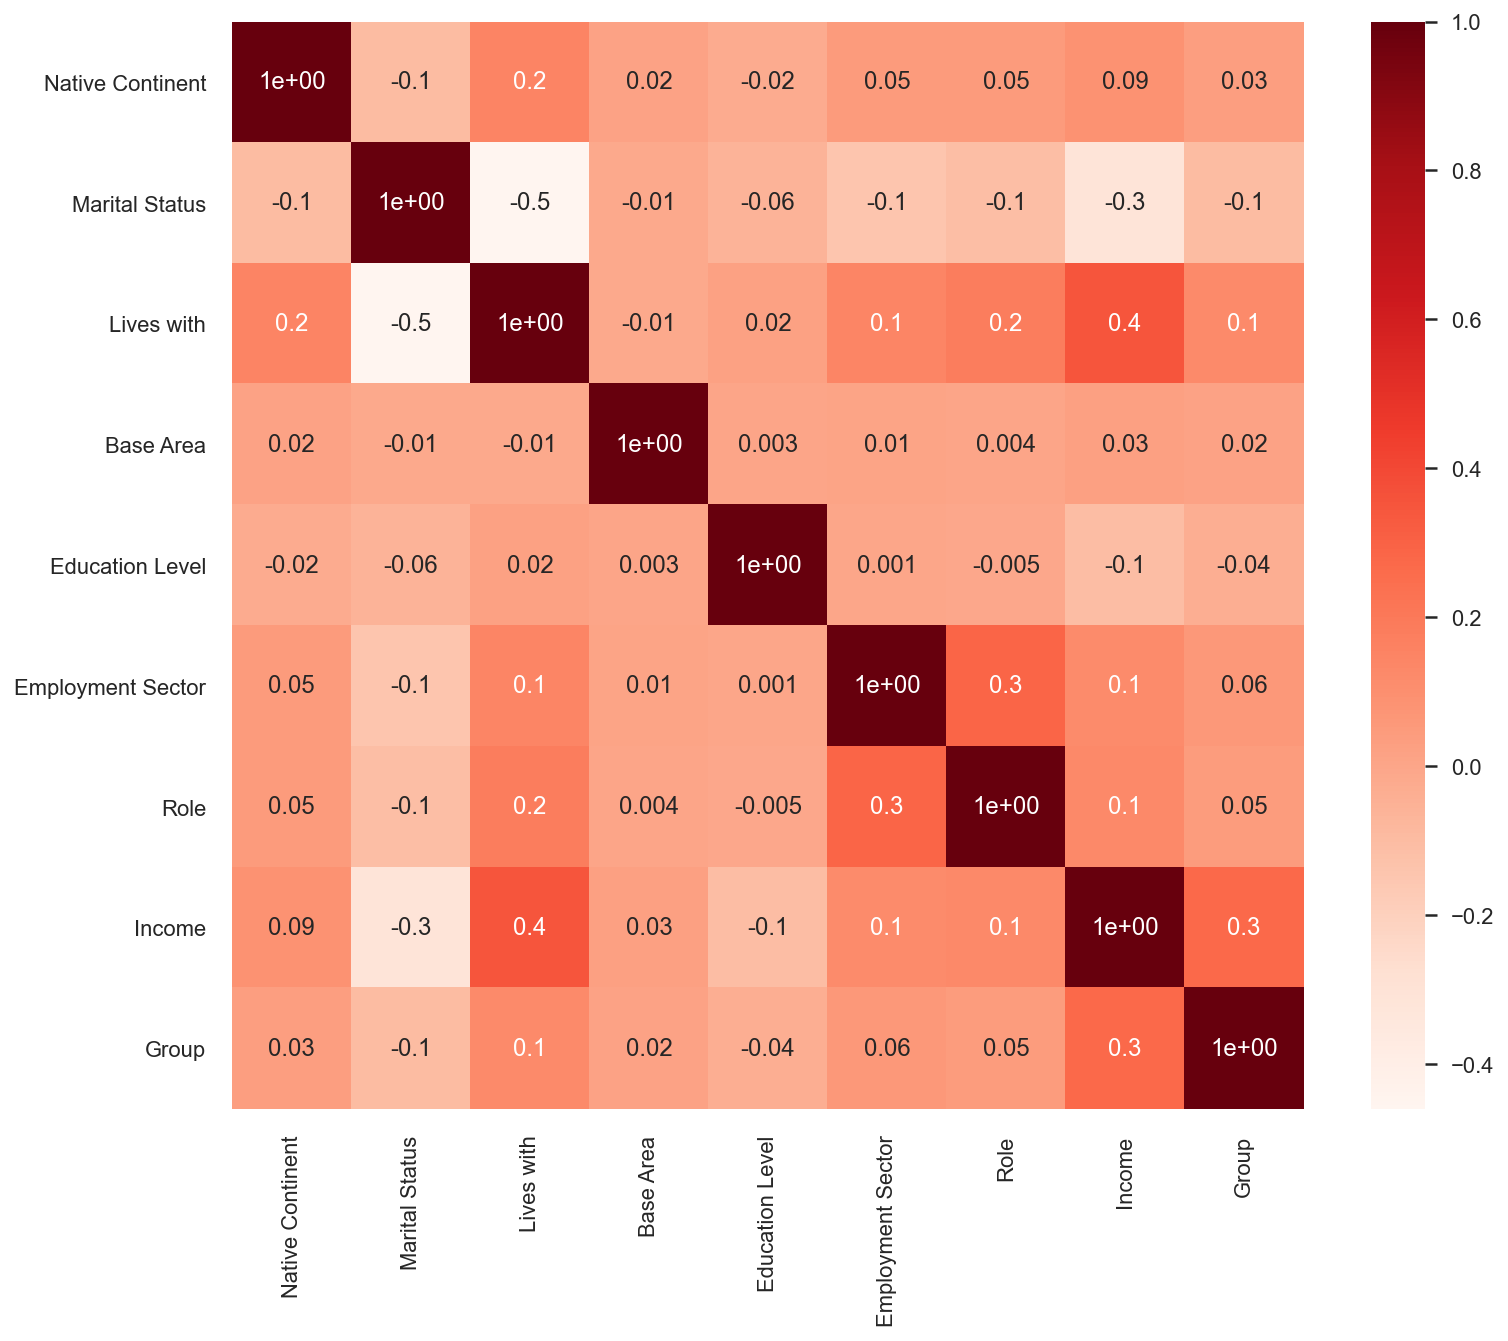

In [178]:
cor_spearman =newland_train_enc.corr()
cor_heatmap(cor_spearman)